# DeepVariant learning

## Determining batch parameters for training tests

The batch size tests require different numbers of examples, as running time is a function of the number of examples and the batch size. I need an Epoch to complete within 24 hours, which includes time for tuning runs. 

The time per step depends on the batch size, and we have tested the batch sizes we need already, so we know the step times. So we can calculate the N examples needed by solving the equations below:


In [3]:
import numpy as np

In [358]:
step_time_by_batch_size = {}

step_time_by_batch_size[1024] = 1/0.0176998
step_time_by_batch_size[512] = 1/0.0356369
step_time_by_batch_size[256] = 1/0.07107
step_time_by_batch_size[128] = 1/0.145764
step_time_by_batch_size[64] = 1/0.280647
step_time_by_batch_size[32] = 1/0.540548


In [2]:
def calculate_training_time(N_training_examples, N_tuning_examples, batch_size, N_tunes):
    
    import numpy as np
    import pandas as pd
    
    step_time_by_batch_size = {}

    step_time_by_batch_size[1024] = 1/0.0176998 ## times are in steps/sec, so putting them over 1 to get secs per step. 
    step_time_by_batch_size[512] = 1/0.0356369
    step_time_by_batch_size[256] = 1/0.07107
    step_time_by_batch_size[128] = 1/0.145764
    step_time_by_batch_size[64] = 1/0.280647
    step_time_by_batch_size[32] = 1/0.540548  

    ## get the step time for the batch size 
    step_time = step_time_by_batch_size[batch_size]

    ## find the number of training steps that will be run for given the batch size and example number
    N_training_steps = int(np.ceil(N_training_examples/batch_size))
    
    ## calculate the total training step time
    total_training_time = int(round(step_time * N_training_steps,2))

    ## calculate the amount of time needed for tuning
    N_tuning_steps = int(np.ceil(N_tuning_examples/batch_size))
    tuning_time = int(round(step_time * N_tuning_steps,0)/9) ## tuning steps seem to take about 1/9th of the time 
    total_tuning_time = N_tunes*tuning_time
    tune_every = int(np.floor((N_training_steps-(N_training_steps/10))/N_tunes))  ## useful for inputting into the DV script
    
    print("N_training_steps:    %s" % N_training_steps)
    print("total_training_time: %s" % pd.Timedelta('%ss' % total_training_time))
    
    print("\nN_tuning_steps:      %s" % N_tuning_steps)
    print("tune every:          %s steps" % tune_every)
    print("tuning time:         %s" % pd.Timedelta('%ss' % tuning_time))
    print("total_tuning_time:   %s" % pd.Timedelta('%ss' % total_tuning_time))
      
    
    ## convert time from seconds into hours. 
    total_time_s = int(np.round(total_training_time + total_tuning_time + (60*60),0)) ## time in seconds (rounded to remove microseconds)
    
    total_time_hms = pd.Timedelta('%ss' % total_time_s)    
            
    print("\nTotal time needed is: %s (h:m:s)" % (total_time_hms))

### BS = 32

In [122]:
N_train = 1300000
N_tune = int(np.round(N_train/15,0))

print("N training examples:  %s" % N_train)
print("N tuning examples:  %s\n" % N_tune)

calculate_training_time(N_training_examples = N_train,
                        N_tuning_examples = N_tune, 
                        batch_size = 32,
                        N_tunes = 5)

N training examples:  1300000
N tuning examples:  86667

N_training_steps:    40625
total_training_time: 0 days 20:52:35

N_tuning_steps:      2709
tune every:          7312 steps
tuning time:         0 days 00:09:16
total_tuning_time:   0 days 00:46:20

Total time needed is: 0 days 22:38:55 (h:m:s)


### BS = 64

In [123]:
N_train = 1300000
N_tune = int(np.round(N_train/15,0))

print("N training examples:  %s" % N_train)
print("N tuning examples:  %s\n" % N_tune)

calculate_training_time(N_training_examples = N_train,
                        N_tuning_examples = N_tune, 
                        batch_size = 64,
                        N_tunes = 5)

N training examples:  1300000
N tuning examples:  86667

N_training_steps:    20313
total_training_time: 0 days 20:06:19

N_tuning_steps:      1355
tune every:          3656 steps
tuning time:         0 days 00:08:56
total_tuning_time:   0 days 00:44:40

Total time needed is: 0 days 21:50:59 (h:m:s)


### BS = 128

In [124]:
N_train = 1300000
N_tune = int(np.round(N_train/15,0))

print("N training examples:  %s" % N_train)
print("N tuning examples:  %s\n" % N_tune)

calculate_training_time(N_training_examples = N_train,
                        N_tuning_examples = N_tune, 
                        batch_size = 128,
                        N_tunes = 5)

N training examples:  1300000
N tuning examples:  86667

N_training_steps:    10157
total_training_time: 0 days 19:21:21

N_tuning_steps:      678
tune every:          1828 steps
tuning time:         0 days 00:08:36
total_tuning_time:   0 days 00:43:00

Total time needed is: 0 days 21:04:21 (h:m:s)


### BS = 256

In [5]:
N_train = 250000
N_tune = int(np.round(N_train/15,0))*2

print("N training examples:  %s" % N_train)
print("N tuning examples:  %s\n" % N_tune)

calculate_training_time(N_training_examples = N_train,
                        N_tuning_examples = N_tune, 
                        batch_size = 256,
                        N_tunes = 5)

N training examples:  250000
N tuning examples:  33334

N_training_steps:    977
total_training_time: 0 days 03:49:07

N_tuning_steps:      131
tune every:          175 steps
tuning time:         0 days 00:03:24
total_tuning_time:   0 days 00:17:00

Total time needed is: 0 days 05:06:07 (h:m:s)


### BS = 512

In [126]:
N_train = 1300000
N_tune = int(np.round(N_train/15,0))

print("N training examples:  %s" % N_train)
print("N tuning examples:  %s\n" % N_tune)

calculate_training_time(N_training_examples = N_train,
                        N_tuning_examples = N_tune, 
                        batch_size = 512,
                        N_tunes = 5)

N training examples:  1300000
N tuning examples:  86667

N_training_steps:    2540
total_training_time: 0 days 19:47:54

N_tuning_steps:      170
tune every:          457 steps
tuning time:         0 days 00:08:50
total_tuning_time:   0 days 00:44:10

Total time needed is: 0 days 21:32:04 (h:m:s)


### BS = 1024

In [127]:
N_train = 1300000
N_tune = int(np.round(N_train/15,0))

print("N training examples:  %s" % N_train)
print("N tuning examples:  %s\n" % N_tune)

calculate_training_time(N_training_examples = N_train,
                        N_tuning_examples = N_tune, 
                        batch_size = 1024,
                        N_tunes = 5)

N training examples:  1300000
N tuning examples:  86667

N_training_steps:    1270
total_training_time: 0 days 19:55:52

N_tuning_steps:      85
tune every:          228 steps
tuning time:         0 days 00:08:53
total_tuning_time:   0 days 00:44:25

Total time needed is: 0 days 21:40:17 (h:m:s)


## Plotting learning curves

## Functions

In [1]:
def Parse_DV_training_log(log_path):
    
    ## These are the various stats reported during training in the log file. 

    training_stats = ["train/categorical_accuracy",
                      "train/categorical_crossentropy",
                      "train/f1_het",
                      "train/f1_homalt",
                      "train/f1_homref",
                      "train/f1_macro",
                      "train/f1_micro",
                      "train/f1_weighted",
                      "train/false_negatives",
                      "train/false_positives",
                      "train/learning_rate",
                      "train/loss",
                      "train/precision",
                      "train/precision_het",
                      "train/precision_homalt",
                      "train/precision_homref",
                      "train/recall",
                      "train/recall_het",
                      "train/recall_homalt",
                      "train/recall_homref",
                      "train/true_negatives",
                      "train/true_positives"]
    
    stats_dict = {}
    stats_dict["iteration"] = []

    with open(log_path) as logs:

        for line in logs:
            
            if "train/categorical_accuracy" in line:

                line = line.split(" ")

                stats_dict["iteration"].append(int(line[4].strip("[]"))) ## record iteration

                for field in line:

                    field_id=field.split("=")[0]

                    if field_id in training_stats:
                        if field_id not in stats_dict:
                            stats_dict[field_id] = []
                        stats_dict[field_id].append(float(field.split("=")[1].strip(",").strip()))
                    
    return stats_dict

In [2]:
def plot_train_stat(stat, stat_dict):
    
    from matplotlib import pyplot as plt

    plt.figure(figsize = (10,5))
    plt.plot(stat_dict["iteration"],
             stat_dict[stat])
    plt.ylabel(stat)
    plt.xlabel("iteration")
    plt.show()

# Systematic training runs

## Step 1

### Run A

In [ ]:
training_stats = ["train/categorical_accuracy",
                      "train/categorical_crossentropy",
                      "train/f1_het",
                      "train/f1_homalt",
                      "train/f1_homref",
                      "train/f1_macro",
                      "train/f1_micro",
                      "train/f1_weighted",
                      "train/false_negatives",
                      "train/false_positives",
                      "train/learning_rate",
                      "train/loss",
                      "train/precision",
                      "train/precision_het",
                      "train/precision_homalt",
                      "train/precision_homref",
                      "train/recall",
                      "train/recall_het",
                      "train/recall_homalt",
                      "train/recall_homref",
                      "train/true_negatives",
                      "train/true_positives"]

In [12]:
logfile_path = "/Users/dj20y461/Data_temp/Stickleback/FITNESS/plot_data/training_plots/systematic_training_runs/Step_1/Run_A/TRAIN_Step1A_13832760-4294967294.err"

stats_dict_1A= Parse_DV_training_log(logfile_path)

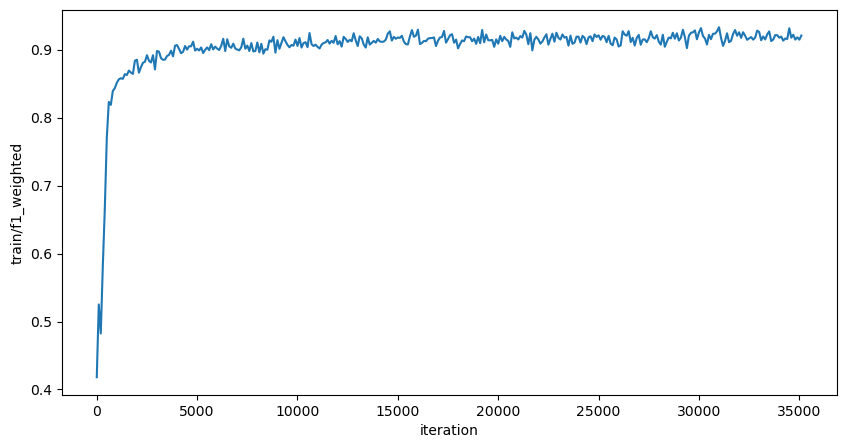

In [14]:
plot_train_stat("train/f1_weighted", stats_dict_1A)

### Run B

In [5]:
logfile_path = "/Users/dj20y461/Data_temp/Stickleback/FITNESS/plot_data/training_plots/systematic_training_runs/Step_1/Run_A/TRAIN_Step1A_13864105-3.err"

stats_dict_1B= Parse_DV_training_log(logfile_path)

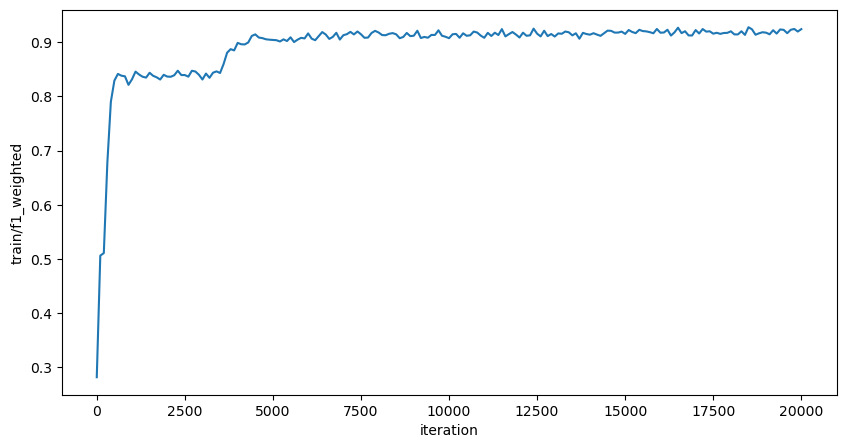

In [6]:
plot_train_stat("train/f1_weighted", stats_dict_1B)

### RUN ALT

In [ ]:
logfile_path = "/Users/dj20y461/Data_temp/Stickleback/FITNESS/plot_data/training_plots/systematic_training_runs/Step_1/Run_A/TRAIN_Step1A_13864105-3.err"

stats_dict_1B= Parse_DV_training_log(logfile_path)

## RUN NEW

In [6]:
logfile_path = "/Users/dj20y461/Data_temp/Stickleback/FITNESS/plot_data/training_plots/NEW/TRAIN_NEW_15211274-5.err"

stats_dict_NEW= Parse_DV_training_log(logfile_path)

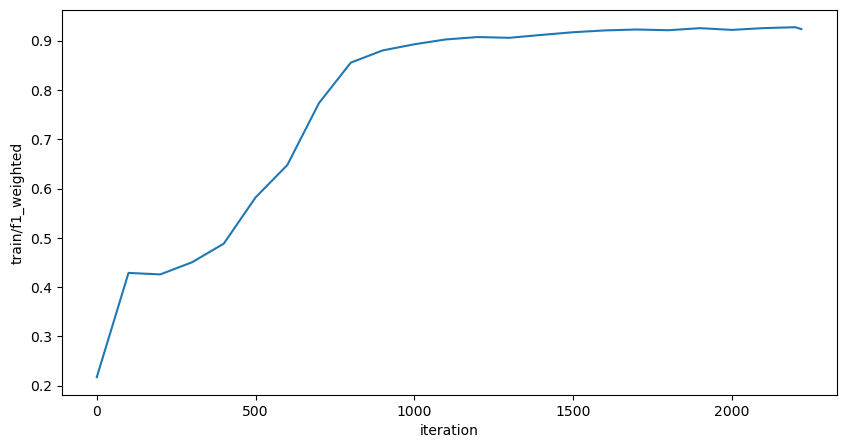

In [7]:
plot_stats = ["train/f1_weighted"]

for stat in plot_stats:
    plot_train_stat(stat, stats_dict_NEW)

## Training_test_1:

"Low" learning rate, "Moderate" batch size

- initial_learning_rate=0.00001
- Training Examples: 700000
- Batch Size: 32
- Epochs: 1
- Steps per epoch: 21875
- Steps per tune: 5000
- Num train steps: 21875

In [80]:
logfile_path = "/Users/dj20y461/Data_temp/Stickleback/FITNESS/plot_data/training_plots/TRAIN_Epoch2_7180504-4294967294.summary.out"

stats_dict_1 = Parse_DV_training_log(logfile_path)

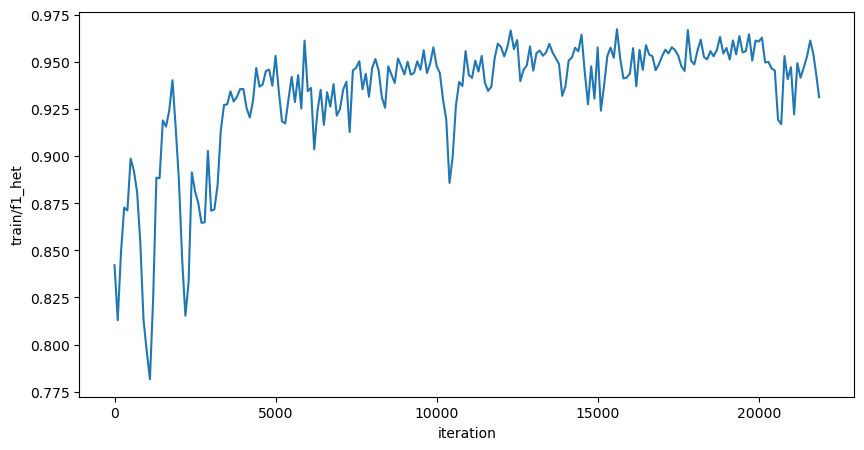

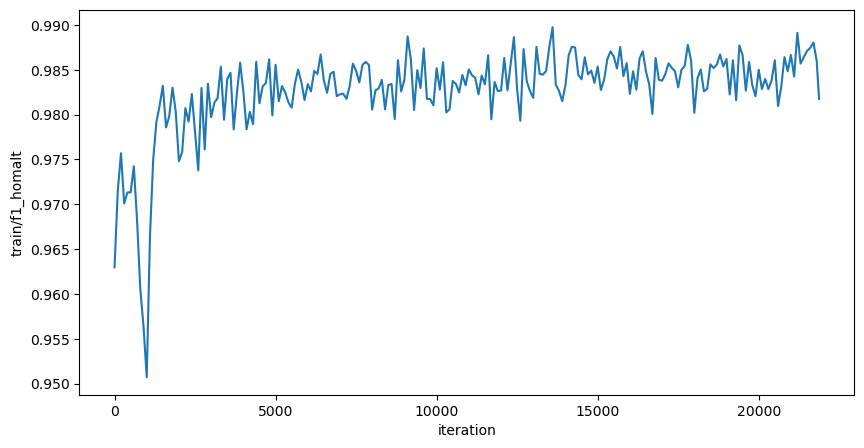

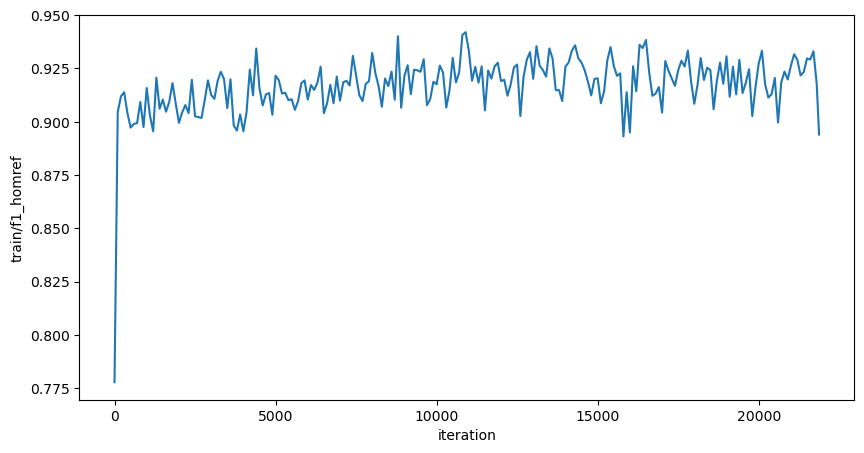

In [81]:
plot_stats = ["train/f1_het",
              "train/f1_homalt",
              "train/f1_homref"]

for stat in plot_stats:
    plot_train_stat(stat, stats_dict_1)

## Training_test_2:

"High" learning rate, "Moderate" batch size

- initial_learning_rate=0.001
- Training Examples: 700000
- Batch Size: 32
- Epochs: 1
- Steps per epoch: 21875
- Steps per tune: 5000
- Num train steps: 21875

In [82]:
logfile_path = "/Users/dj20y461/Data_temp/Stickleback/FITNESS/plot_data/training_plots/TRAIN_high_learning_rate_Epoch1_7227361-4294967294.summary.out"

stats_dict_2 = Parse_DV_training_log(logfile_path)

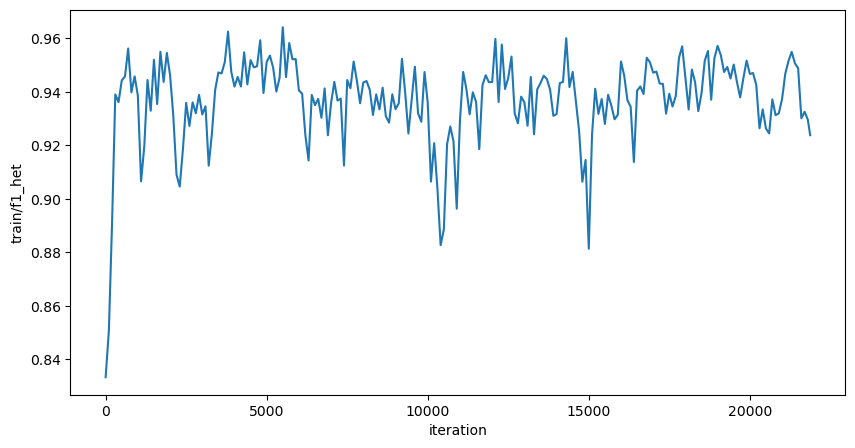

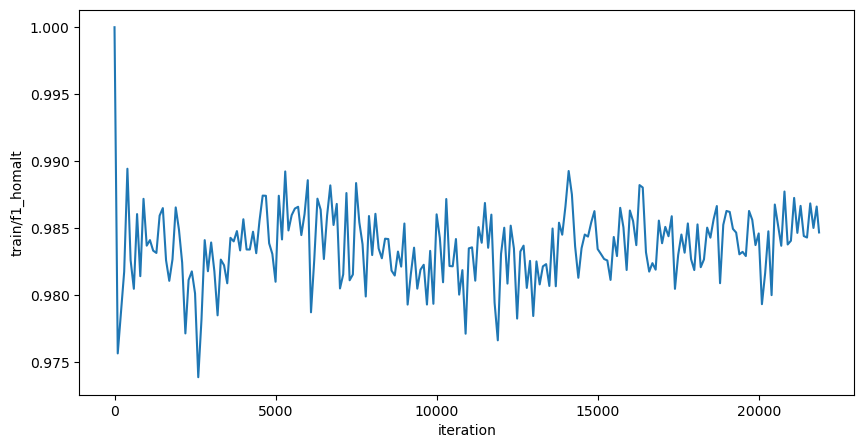

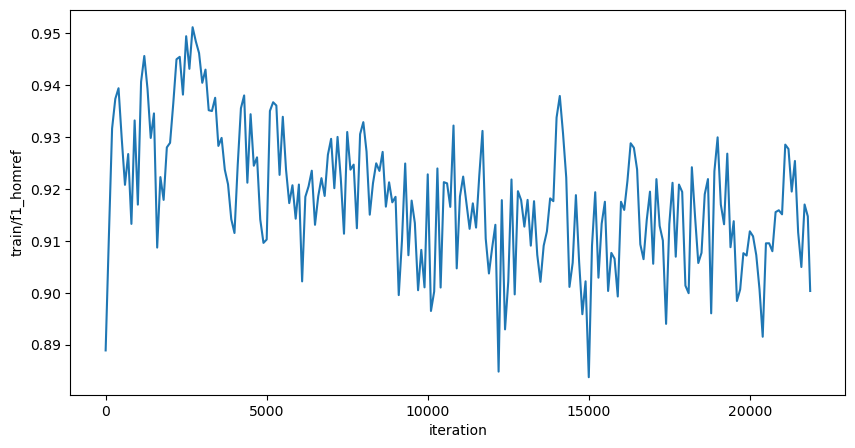

In [51]:
plot_stats = ["train/f1_het",
              "train/f1_homalt",
              "train/f1_homref"]

for stat in plot_stats:
    plot_train_stat(stat, stats_dict_2)

## Training_test_3:

"Moderate" learning rate, "High(er)" batch size

- initial_learning_rate=0.0001
- Training Examples: 700000
- Batch Size: 64
- Epochs: 1
- Steps per epoch: 10937
- Steps per tune: 2500
- Num train steps: 10937

In [52]:
logfile_path = "/Users/dj20y461/Data_temp/Stickleback/FITNESS/plot_data/training_plots/TRAIN_large_batches_Epoch1_7393092-4294967294.summary.out"

stats_dict_3 = Parse_DV_training_log(logfile_path)

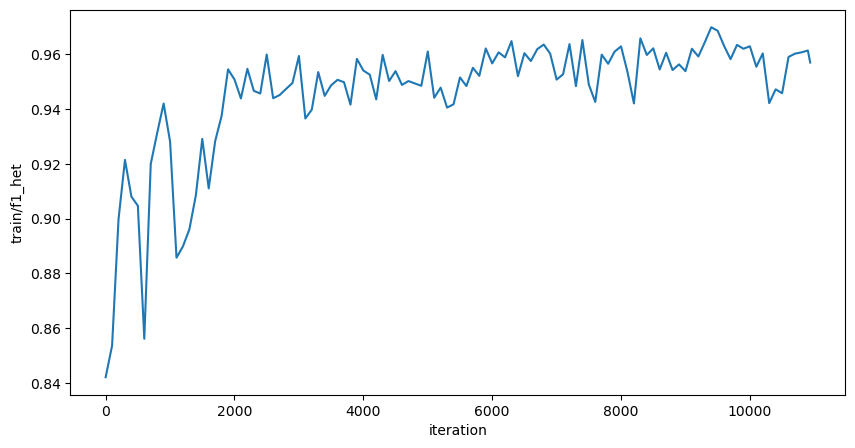

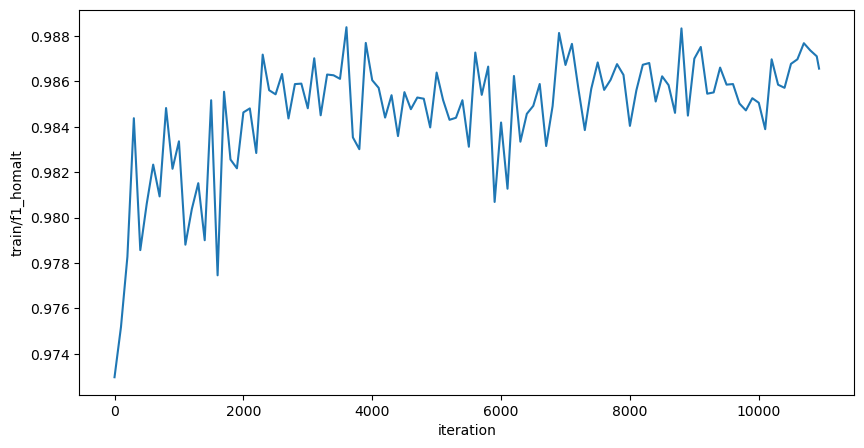

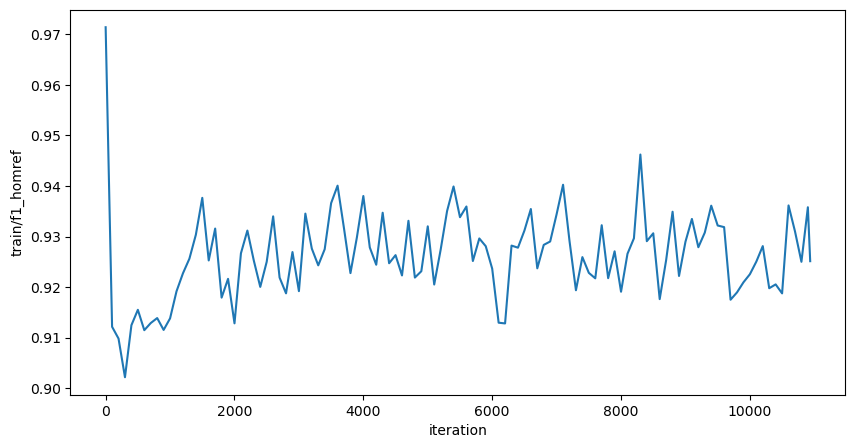

In [54]:
plot_stats = ["train/f1_het",
              "train/f1_homalt",
              "train/f1_homref"]

for stat in plot_stats:
    plot_train_stat(stat, stats_dict_3)

## Learning rate tests

In [56]:
## epoch 1

steps = [0,
         100,
         200,
         300,
         400,
         500,
         600,
         700,
         718]

lr_0_01 = [0.93359375,
           0.9644531011581421,
           0.967041015625,
           0.9691113233566284,
           0.9691699147224426,
           0.9708691239356995,
           0.9720214605331421,
           0.9714941382408142,
           0.9714084267616272]

lr_0_001 = [0.947265625,
            0.9551074504852295,
            0.9601953029632568,
            0.9626855254173279,
            0.9650976657867432,
            0.9669726490974426,
            0.9670605659484863,
            0.9688085913658142,
            0.9680446982383728]

lr_0_0001 = [0.9482421875,
             0.9461816549301147,
             0.9518749713897705,
             0.9540136456489563,
             0.9566991925239563,
             0.957324206829071,
             0.9588964581489563,
             0.9612890481948853,
             0.9595268964767456]

lr_0_00001 = [0.935546875,
              0.9388964772224426,
              0.9408203363418579,
              0.9439257979393005,
              0.9457714557647705,
              0.9445507526397705,
              0.9469824433326721,
              0.9497460722923279,
              0.9456923007965088]

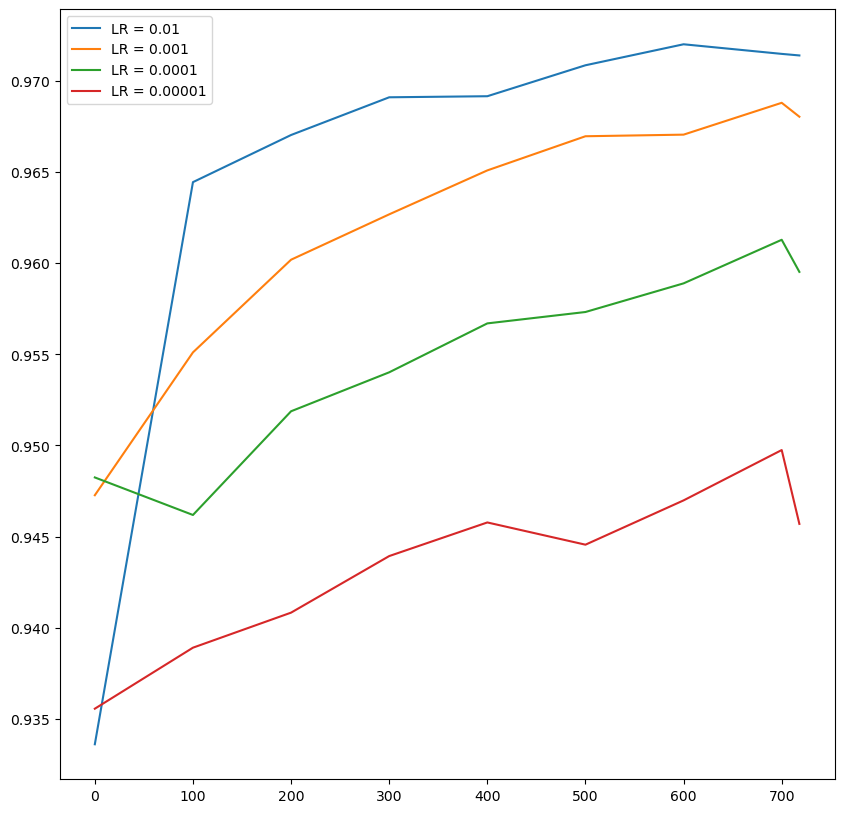

In [62]:
plt.figure(figsize = (10,10))

plt.plot(steps, lr_0_01, label = 'LR = 0.01')
plt.plot(steps, lr_0_001, label = 'LR = 0.001')
plt.plot(steps, lr_0_0001, label = 'LR = 0.0001')
plt.plot(steps, lr_0_00001, label = 'LR = 0.00001')

plt.legend()

plt.show()

So it seems that at least initially, large learning rate is more useful. . . . but how long would that last? E.g. LR 0.01 looks like it is plateuing, while the others are not. Would they overtake if we ran it for longer? Lets see - we can run 0.01 and 0.001 for longer. Though the others do not have any checkpoints. 

In [55]:
## epoch 2

steps2 = [0+500,
         100+500,
         200+500,
         300+500,
         400+500,
         500+500,
         600+500,
         700+500,
         718+500]

lr_0_01_ep2 = [0.9677734375,
           0.9715039134025574,
           0.9724414348602295,
           0.9720117449760437,
           0.9726952910423279,
           0.9730175733566284,
           0.9726952910423279,
           0.9720410108566284,
           0.9731987714767456]

lr_0_001_ep2 = [0.9638671875,
            0.968212902545929,
            0.9680566191673279,
            0.9689159989356995,
            0.9701952934265137,
            0.9702538847923279,
            0.9716015458106995,
            0.9719921946525574,
            0.9706488847732544]




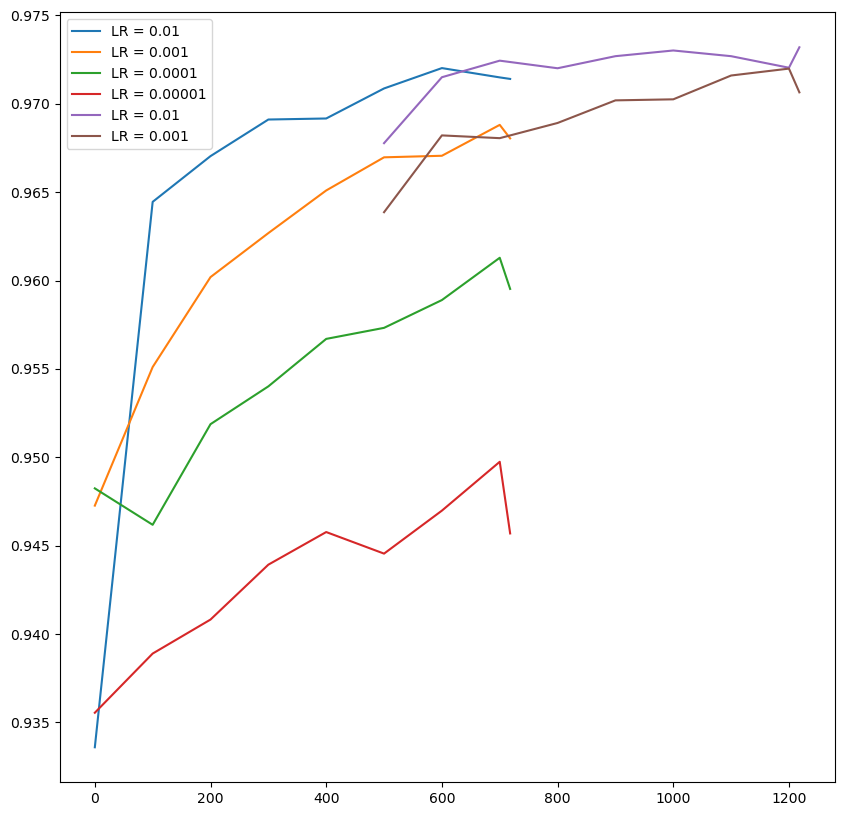

In [58]:
plt.figure(figsize = (10,10))

## epoch 1

plt.plot(steps, lr_0_01, label = 'LR = 0.01')
plt.plot(steps, lr_0_001, label = 'LR = 0.001')
plt.plot(steps, lr_0_0001, label = 'LR = 0.0001')
plt.plot(steps, lr_0_00001, label = 'LR = 0.00001')

## epoch 2 (starts at 500)

plt.plot(steps2, lr_0_01_ep2, label = 'LR = 0.01')
plt.plot(steps2, lr_0_001_ep2, label = 'LR = 0.001')

plt.legend()

plt.show()

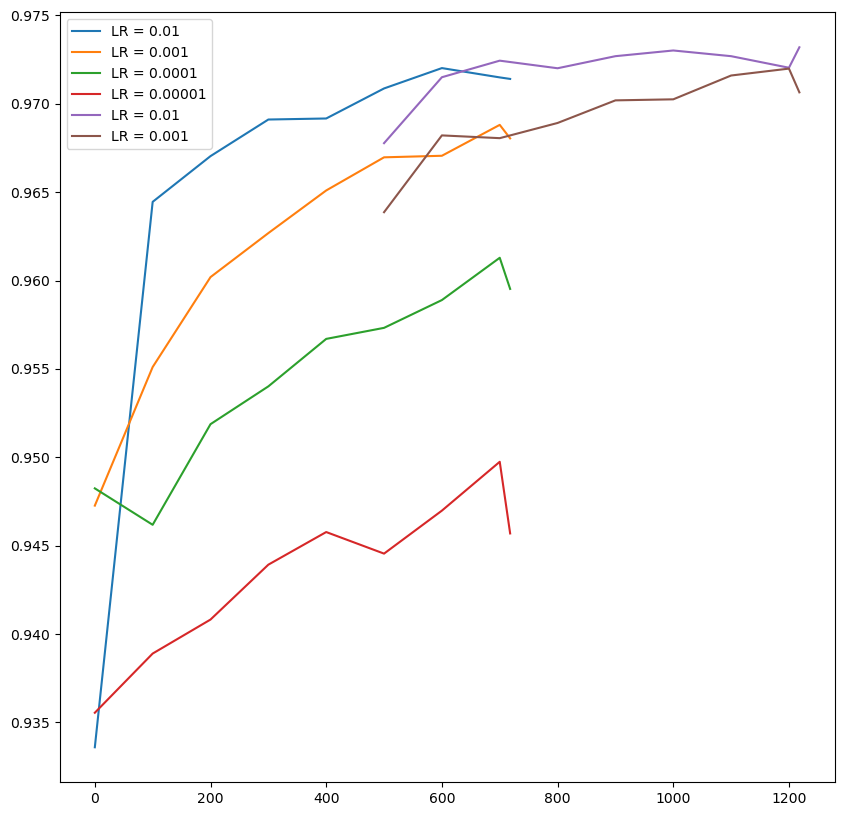

In [62]:
plt.figure(figsize = (10,10))

## epoch 1

plt.plot(steps, lr_0_01, label = 'LR = 0.01')
plt.plot(steps, lr_0_001, label = 'LR = 0.001')
plt.plot(steps, lr_0_0001, label = 'LR = 0.0001')
plt.plot(steps, lr_0_00001, label = 'LR = 0.00001')

## epoch 2 (starts at 500)

plt.plot(steps2, lr_0_01_ep2, label = 'LR = 0.01')
plt.plot(steps2, lr_0_001_ep2, label = 'LR = 0.001')

plt.legend() 

plt.show()

Hmm, would you believe it they more or less converge, but you can tell from the gradients that they 0.001 would cross. 

I could also add the model that I trained for longer

In [81]:
steps3 = [0,
          100,
          200,
          300,
          400,
          500,
          600,
          700,
          800,
          900,
          1000,
          1100,
          1200,
          1300]

lr_0_001_bs_1024 = [0.9345703125,
                    0.950732409954071,
                    0.9595507979393005,
                    0.963671863079071,
                    0.9646777510643005,
                    0.9664160013198853,
                    0.9668262004852295,
                    0.96826171875,
                    0.9683691263198853,
                    0.9679296612739563,
                    0.9682714939117432,
                    0.9681249856948853,
                    0.9691503643989563,
                    0.9697167873382568]

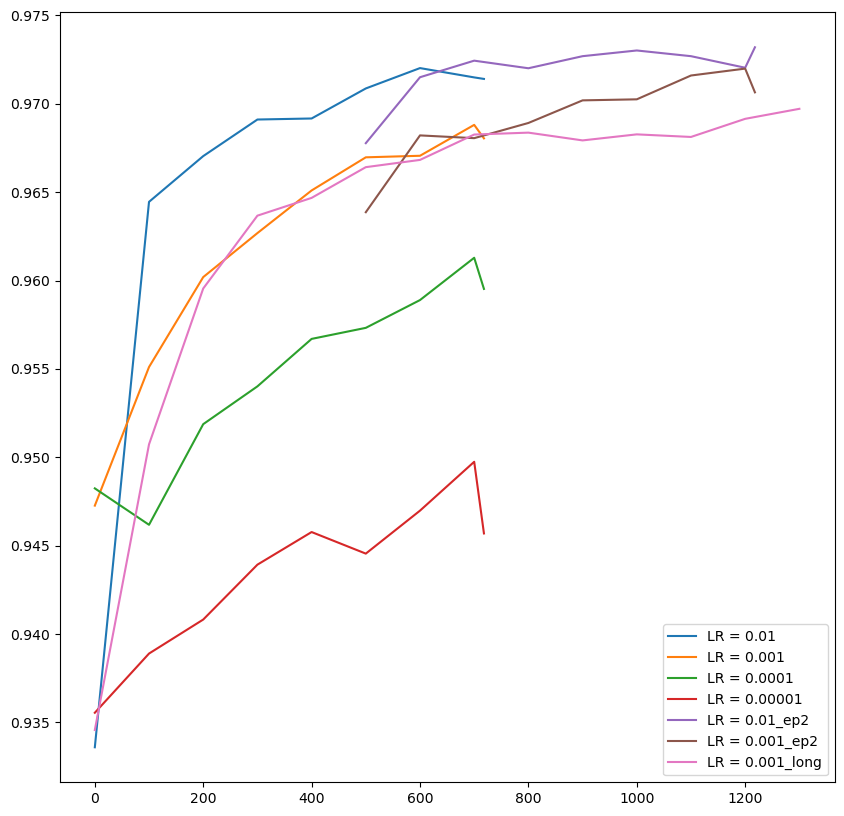

In [67]:
plt.figure(figsize = (10,10))

## epoch 1

plt.plot(steps, lr_0_01, label = 'LR = 0.01')
plt.plot(steps, lr_0_001, label = 'LR = 0.001')
plt.plot(steps, lr_0_0001, label = 'LR = 0.0001')
plt.plot(steps, lr_0_00001, label = 'LR = 0.00001')

## epoch 2 (starts at 500)

plt.plot(steps2, lr_0_01_ep2, label = 'LR = 0.01_ep2')
plt.plot(steps2, lr_0_001_ep2, label = 'LR = 0.001_ep2')

## large model train

plt.plot(steps3, lr_0_001_bs_1024, label = 'LR = 0.001_long')

plt.legend() 

plt.show()


Hmm, the long train model is not actually any better, though it might have been at some point. It definitely looks like the lower learning rate models would keep learning for a while, the higher rate model plateaus much faster. Learning rate decay is definitely a thing to play with. 

## Learning rate manual dropdown


In [79]:
steps4 = [0+500,
          100+500,
          200+500,
          300+500,
          400+500,
          500+500,
          600+500,
          700+500,
          800+500,
          900+500,
          1000+500,
          1100+500,
          1200+500,
          1300+500]

lr_0_01_0_001_dropdown = [0.9595218300819397,
                          0.9692324995994568,
                          0.9707854986190796,
                          0.9709370136260986,
                          0.9716606736183167,
                          0.971480131149292,
                          0.9720636606216431,
                          0.9719958901405334,
                          0.9716865420341492,
                          0.9727180600166321,
                          0.9718790054321289,
                          0.9717308878898621,
                          0.972246527671814,
                          0.9718878865242004]

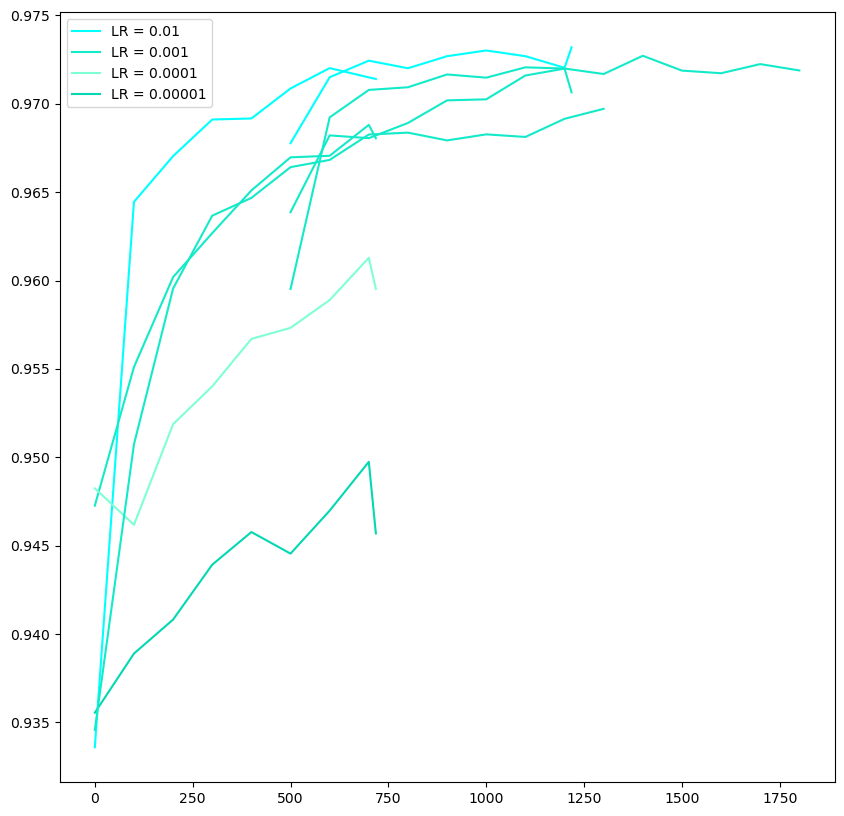

In [82]:
plt.figure(figsize = (10,10))

## epoch 1

plt.plot(steps, lr_0_01, label = 'LR = 0.01', c = "#00FFFF")
plt.plot(steps, lr_0_001, label = 'LR = 0.001', c = "#13EAC9")
plt.plot(steps, lr_0_0001, label = 'LR = 0.0001', c = "#7FFFD4")
plt.plot(steps, lr_0_00001, label = 'LR = 0.00001', c = "#04D8B2")

## epoch 2 (starts at 500)

plt.plot(steps2, lr_0_01_ep2, c = "#00FFFF")
plt.plot(steps2, lr_0_001_ep2, c = "#13EAC9")

## large model train

plt.plot(steps3, lr_0_001_bs_1024, c = "#13EAC9")

## lr_dropdown

plt.plot(steps4, lr_0_01_0_001_dropdown, c = "#13EAC9") 

plt.legend() 

plt.show()

So note how, whether it is a long training run of ~1000 steps, multiple consecutive short training runs the best results all converge around 0.0971-0.0972. 

## Learning rate dropdown round 2

In [83]:
def Parse_DV_training_log(log_path):
    
    
    ## These are the various stats reported during training in the log file. 

    training_stats = []
    
    stats_dict = {}
    stats_dict["train_iterations"] = []
    stats_dict["tune_iterations"] = []

    with open(log_path) as logs:

        for line in logs:
            
            if "train/categorical_accuracy" in line or "tune/categorical_accuracy" in line:

                line = line.split(" ")

                for field in line:

                    if "=" in field:
                        field_id=field.split("=")[0]
                        
                        if "train" in field_id:
                            if int(line[4].strip("[]")) not in stats_dict["train_iterations"]:
                                stats_dict["train_iterations"].append(int(line[4].strip("[]"))) ## record iteration

                        if field_id not in training_stats:
                            training_stats.append(field_id)
                        
                        if field_id not in stats_dict:
                            stats_dict[field_id] = []
                        stats_dict[field_id].append(float(field.split("=")[1].strip(",").strip()))
                        
                        if "tune" in field_id:
                            if int(line[4].strip("[]")) not in stats_dict["tune_iterations"]:
                                stats_dict["tune_iterations"].append(int(line[4].strip("[]")))
                    
    return stats_dict

In [61]:
TRAIN_lr_0_01_bs_1024_ep1 = Parse_DV_training_log("/Users/dj20y461/Data_temp/Stickleback/FITNESS/plot_data/training_plots/round_2_lr_decrease/TRAIN_lr_0_01_bs_1024_ep1_12124182-4294967294.err")


In [73]:
TRAIN_lr_0_001_bs_1024_ep2["tune_iterations"][1:3]

[200, 400]

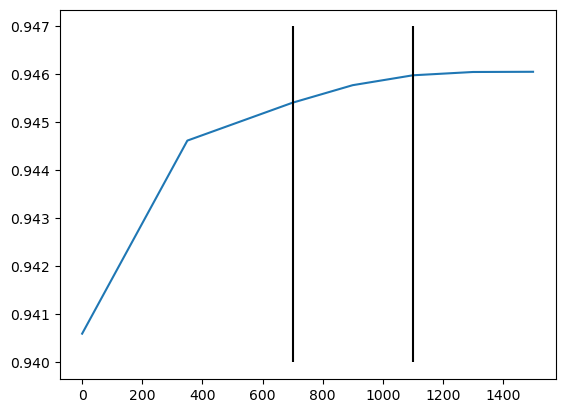

In [75]:
TRAIN_lr_0_01_bs_1024_ep1 = Parse_DV_training_log("/Users/dj20y461/Data_temp/Stickleback/FITNESS/plot_data/training_plots/round_2_lr_decrease/TRAIN_lr_0_01_bs_1024_ep1_12124182-4294967294.err")
TRAIN_lr_0_001_bs_1024_ep2 = Parse_DV_training_log("/Users/dj20y461/Data_temp/Stickleback/FITNESS/plot_data/training_plots/round_2_lr_decrease/TRAIN_lr_0_01_bs_1024_ep1_12167042-4294967294.err")
TRAIN_lr_0_0001_bs_1024_ep3 = Parse_DV_training_log("/Users/dj20y461/Data_temp/Stickleback/FITNESS/plot_data/training_plots/round_2_lr_decrease/TRAIN_lr_0_01_bs_1024_ep1_12188159-4294967294.err")

## I used checkpoint 700 from lr_0_01_bs_1024_ep1 to start lr_0_001_bs_1024_ep2
## AND I used checkpoint 400 from lr_0_001_bs_1024_ep2 to start TRAIN_lr_0_0001_bs_1024_ep3
## AND checkpoint 400 was the best from TRAIN_lr_0_0001_bs_1024_ep3

all_iterations = TRAIN_lr_0_01_bs_1024_ep1["tune_iterations"][0:3] + [i+700 for i in TRAIN_lr_0_001_bs_1024_ep2["tune_iterations"][1:3]] + [i+1100 for i in TRAIN_lr_0_0001_bs_1024_ep3["tune_iterations"][1:3]]

all_loss = TRAIN_lr_0_01_bs_1024_ep1['tune/f1_weighted'][0:3]+TRAIN_lr_0_001_bs_1024_ep2['tune/f1_weighted'][1:3]+TRAIN_lr_0_0001_bs_1024_ep3['tune/f1_weighted'][1:3]

plt.plot(all_iterations,
         all_loss)
plt.vlines(700, 0.94, 0.947, color = "black")
plt.vlines(1100, 0.94, 0.947, color = "black")

plt.show()


Ok, so on the face of it this looks good. The f1_weighted increases until it plateaus. The number of tuning steps could be higher, it would be nice to be able to run this for longer for sure! 

## GATK vs DV comparisons 


I want to compare my trainined DV models to GATK calls, as this real world comparison is more useful than the internal learning stats for deciding how good the models are. 

Specifically I will compare N_snps and the amount of Mendelian discordance in the calls. 

In [20]:
mend_sum_path = "/Users/dj20y461/Data_temp/Stickleback/FITNESS/plot_data/Mendelian_evaluations/test_121124/mendelian_eval_summary.txt"

In [11]:
mend_dict = {}

with open(mend_sum_path) as mend_sum:
    
    headers = next(mend_sum)

    for line in mend_sum:
        callset = line.split()[0]
        family = line.split()[1]
        N_disc = int(line.split()[2])
        N_total = int(line.split()[3])
        perc_disc = float(line.split()[4])
        
        if family not in mend_dict:
            mend_dict[family] = {}
            
        if callset not in mend_dict[family]:
            mend_dict[family][callset] = {}
            
        mend_dict[family][callset]["N_disc"] = N_disc
        mend_dict[family][callset]["N_total"] = N_total
        mend_dict[family][callset]["perc_disc"] = perc_disc
        
    

In [21]:
mend_dict

{'TL': {'DV': {'N_disc': 814, 'N_total': 76845, 'perc_disc': 1.06},
  'DV_Q30': {'N_disc': 562, 'N_total': 74194, 'perc_disc': 0.76},
  'GATK': {'N_disc': 86861, 'N_total': 2250893, 'perc_disc': 3.86},
  'GATK_Q30': {'N_disc': 6784, 'N_total': 187044, 'perc_disc': 3.63},
  'GATKfull': {'N_disc': 174, 'N_total': 61379, 'perc_disc': 0.28},
  'DVfull': {'N_disc': 3, 'N_total': 23911, 'perc_disc': 0.01}},
 'WB': {'DV': {'N_disc': 1235, 'N_total': 72490, 'perc_disc': 1.7},
  'DV_Q30': {'N_disc': 932, 'N_total': 70596, 'perc_disc': 1.32},
  'GATK': {'N_disc': 148981, 'N_total': 4407112, 'perc_disc': 3.38},
  'GATK_Q30': {'N_disc': 13899, 'N_total': 394344, 'perc_disc': 3.52},
  'GATKfull': {'N_disc': 229, 'N_total': 116798, 'perc_disc': 0.2},
  'DVfull': {'N_disc': 2, 'N_total': 20182, 'perc_disc': 0.01}},
 'FG': {'DV': {'N_disc': 1047, 'N_total': 100416, 'perc_disc': 1.04},
  'DV_Q30': {'N_disc': 767, 'N_total': 97203, 'perc_disc': 0.79},
  'GATK': {'N_disc': 111128, 'N_total': 3431289, 'pe

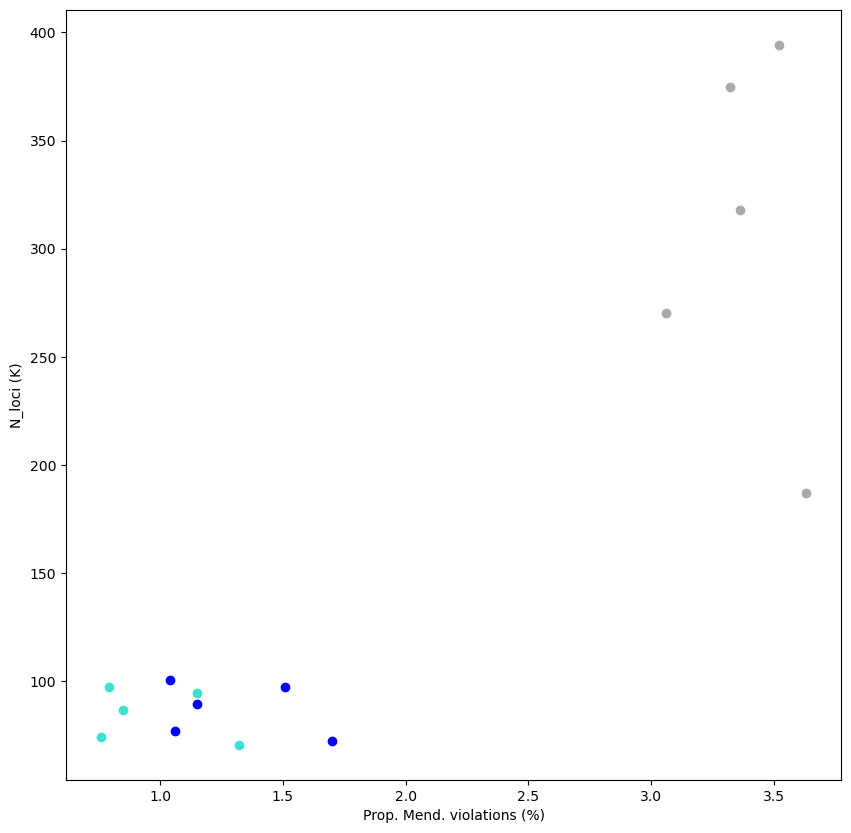

In [13]:
from matplotlib import pyplot as plt

fams = ["FG","KK","TL","SR", "WB"]

callsets = ['DV','DV_Q30','GATK_Q30'] #'GATK',

callset_cols = {'DV': "blue",
                'DV_Q30': "turquoise",
                'GATK_Q30': "darkgrey"}

test_partitions = {'FG': ["chr11", "chr16"],
                   'KK': ["chr12", "chr17"],
                   'TL': ["chr14", "chr20"],
                   'SR': ["chr13", "chr18"],
                   'WB': ["chr15", "chr21"]}
            
plt.figure(figsize = (10,10))
for fam in fams:
    for callset in callsets:
        plt.scatter(mend_dict[fam][callset]["perc_disc"], 
                    mend_dict[fam][callset]["N_total"]/1000,
                    c = callset_cols[callset])
        #plt.text(mend_dict[fam][callset]["perc_disc"], 
        #         mend_dict[fam][callset]["N_total"]/1000,
        #         "%s, %s" % (callset, fam))
        plt.ylabel("N_loci (K)")
        plt.xlabel("Prop. Mend. violations (%)")
        
plt.savefig("/Users/dj20y461/Data_temp/Stickleback/FITNESS/plots/Mendelian_tests_121124.pdf")
plt.show()



In [14]:
GATK_full_filters_stats = {"FG":(367, 133469),
                           "KK":(242, 147774),
                           "SR":(330, 144190),
                           "TL":(174, 61379),
                           "WB":(229, 116798)}

In [15]:
import numpy as np
for fam in GATK_full_filters_stats:
    
    mend_dict[fam]["GATKfull"] = {}
    mend_dict[fam]["GATKfull"]['N_disc'] = GATK_full_filters_stats[fam][0]
    mend_dict[fam]["GATKfull"]['N_total'] = GATK_full_filters_stats[fam][1]
    mend_dict[fam]["GATKfull"]['perc_disc'] = np.round(((GATK_full_filters_stats[fam][0]/GATK_full_filters_stats[fam][1])*100),2)

In [16]:
DV_full_filters_stats = {"FG":(5, 38658),
                         "KK":(6, 35945),
                         "SR":(4, 45210),
                         "TL":(3, 23911),
                         "WB":(2, 20182)}


In [17]:
import numpy as np

for fam in DV_full_filters_stats:
    
    mend_dict[fam]["DVfull"] = {}
    mend_dict[fam]["DVfull"]['N_disc'] = DV_full_filters_stats[fam][0]
    mend_dict[fam]["DVfull"]['N_total'] = DV_full_filters_stats[fam][1]
    mend_dict[fam]["DVfull"]['perc_disc'] = np.round(((DV_full_filters_stats[fam][0]/DV_full_filters_stats[fam][1])*100),2)

In [22]:
mend_dict

{'TL': {'DV': {'N_disc': 814, 'N_total': 76845, 'perc_disc': 1.06},
  'DV_Q30': {'N_disc': 562, 'N_total': 74194, 'perc_disc': 0.76},
  'GATK': {'N_disc': 86861, 'N_total': 2250893, 'perc_disc': 3.86},
  'GATK_Q30': {'N_disc': 6784, 'N_total': 187044, 'perc_disc': 3.63},
  'GATKfull': {'N_disc': 174, 'N_total': 61379, 'perc_disc': 0.28},
  'DVfull': {'N_disc': 3, 'N_total': 23911, 'perc_disc': 0.01}},
 'WB': {'DV': {'N_disc': 1235, 'N_total': 72490, 'perc_disc': 1.7},
  'DV_Q30': {'N_disc': 932, 'N_total': 70596, 'perc_disc': 1.32},
  'GATK': {'N_disc': 148981, 'N_total': 4407112, 'perc_disc': 3.38},
  'GATK_Q30': {'N_disc': 13899, 'N_total': 394344, 'perc_disc': 3.52},
  'GATKfull': {'N_disc': 229, 'N_total': 116798, 'perc_disc': 0.2},
  'DVfull': {'N_disc': 2, 'N_total': 20182, 'perc_disc': 0.01}},
 'FG': {'DV': {'N_disc': 1047, 'N_total': 100416, 'perc_disc': 1.04},
  'DV_Q30': {'N_disc': 767, 'N_total': 97203, 'perc_disc': 0.79},
  'GATK': {'N_disc': 111128, 'N_total': 3431289, 'pe

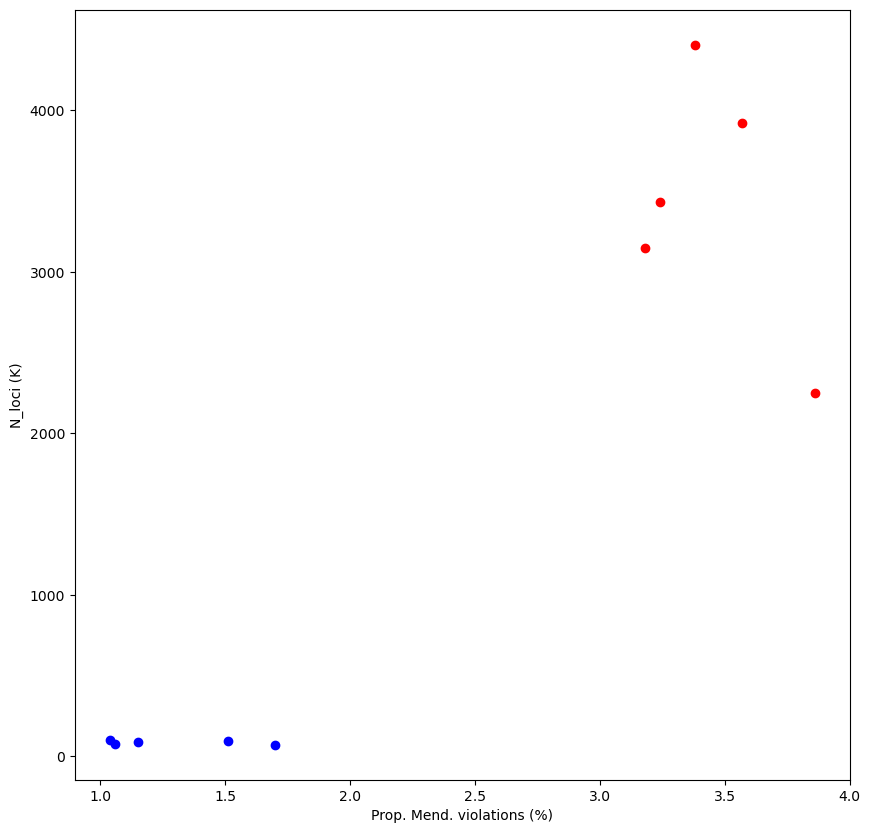

In [24]:
from matplotlib import pyplot as plt

fams = ["FG","KK","TL","SR", "WB"]

#callsets = ['DV','DV_Q30', 'DVfull', 'GATK_Q30',"GATKfull"] #'GATK',
callsets = ['DV', "GATK"] #'GATK',

callset_cols = {'DV': "blue",
                'DV_Q30': "turquoise",
                'DVfull': "darkblue",
                'GATK_Q30': "darkgrey",
                'GATKfull': "black",
                'GATK':'red'}

test_partitions = {'FG': ["chr11", "chr16"],
                   'KK': ["chr12", "chr17"],
                   'TL': ["chr14", "chr20"],
                   'SR': ["chr13", "chr18"],
                   'WB': ["chr15", "chr21"]}
            
plt.figure(figsize = (10,10))
for fam in fams:
    for callset in callsets:
        plt.scatter(mend_dict[fam][callset]["perc_disc"], 
                    mend_dict[fam][callset]["N_total"]/1000,
                    c = callset_cols[callset])
        #plt.text(mend_dict[fam][callset]["perc_disc"], 
        #         mend_dict[fam][callset]["N_total"]/1000,
        #         "%s, %s" % (callset, fam))
        plt.ylabel("N_loci (K)")
        plt.xlabel("Prop. Mend. violations (%)")
        
#plt.savefig("/Users/dj20y461/Data_temp/Stickleback/FITNESS/plots/Mendelian_tests_121124.pdf")
plt.show()



## Mend Violations by GQ

In the mosquito training blog the DVelopers make the point that the GQ and other filters are not comparable between approaches. Only within. Also, the other filters we may apply could also work differently, as DV does a lot of cryptic filtering according to the weights of the neural net. This means that we can't just filter using GQ20 and expect that to be comparable. 

However GQ and other filters are useful ***within*** approaches. So we can do a few things to assess this. We could filter by GQ20 in GATK, and then use whichever GQ value gives us a comparable number of loci in DV. Then we can ask, for this many sample, how many mend violations are there for DV vs GATK. Ideally, for the same number of loci DV would have a lower number of mend violations. 

A more complete approach would be to ***rank*** the loci in each call set. So instead of asking, which call set is better after comparable GQ filters, we can ask, which approach has the best ***top 100k*** loci, for instance. 

Instead of trying to do this via filtering VCFs (e.g. using b/vcftools) I will do this here in python, as we can do it all simultaneously. 


### Define some functions

In [84]:
def parse_sample_field_vcf(GT_field, format_field):
    
    """
    Parse the genotype field for a given sample
    """
    ## not converting types here, as there are some annoying exceptions. Deal with this downstream

    ## Get GT
    GT_index = 0
    for field in format_field.split(":"):
        if field == "GT":
            GT_INDEX = GT_index
        GT_index += 1 
        
    GT = GT_field.split(":")[GT_INDEX]
    
    ## Get DP
    DP_index = 0
    for field in format_field.split(":"):
        if field == "DP":
            DP_INDEX = DP_index
        DP_index += 1
    
    DP = GT_field.split(":")[DP_INDEX]
    
    ## Get GQ
    GQ_index = 0
    for field in format_field.split(":"):
        if field == "GQ":
            GQ_INDEX = GQ_index
        GQ_index += 1
    
    GQ = GT_field.split(":")[GQ_INDEX]
        
    ## Only getting AD from loci with a SNP. 
    
    AD_index = 0
    for field in format_field.split(":"):
        if field == "AD":
            AD_INDEX = AD_index
        AD_index += 1
    
    AD =  GT_field.split(":")[AD_INDEX]
                                    
 
    return GT, AD, DP, GQ

In [85]:
def check_mend_eval(record_INFO_field):
    
    """ 
    Checks the INFO field from a VCF for the "MCV" flag, annotaed by RTG mendelian
    """
    
    if "MCV" in record_INFO_field:
        MCV = True
    else:
        MCV = False
    
    return MCV       
    
    

In [86]:
def parse_pedigree_VCF(vcf_path, father_index, mother_index, offspring_index):
    
    import gzip as gz
    
    out_sample_dict = {}
    out_record_dict = {}

    with gz.open(vcf_path, 'rt') as vcf:

        line_index = 0

        for line in vcf:

            if line.startswith('#CHROM'):  ## set up dictionary with sample names

                father = line.split()[father_index]
                out_sample_dict[father] = {}
                out_sample_dict[father]["index"] = father_index
                out_sample_dict[father]["coords"] = []
                out_sample_dict[father]["GTs"] = []
                out_sample_dict[father]["DPs"] = []
                out_sample_dict[father]["GQs"] = []
                out_sample_dict[father]["ADs"] = []

                mother = line.split()[mother_index]
                out_sample_dict[mother] = {}
                out_sample_dict[mother]["index"] = mother_index
                out_sample_dict[mother]["coords"] = []
                out_sample_dict[mother]["GTs"] = []
                out_sample_dict[mother]["DPs"] = []
                out_sample_dict[mother]["GQs"] = []
                out_sample_dict[mother]["ADs"] = []

                offspring = line.split()[offspring_index]
                out_sample_dict[offspring] = {}
                out_sample_dict[offspring]["index"] = offspring_index
                out_sample_dict[offspring]["coords"] = []
                out_sample_dict[offspring]["GTs"] = []
                out_sample_dict[offspring]["DPs"] = []
                out_sample_dict[offspring]["GQs"] = []
                out_sample_dict[offspring]["ADs"] = []            

                print("Father:", father)
                print("Mother:", mother)
                print("Offspring:", offspring)

            if not line.startswith("#"):# and line_index <= 10: ## for the locus lines

                CHROM = line.split()[0]
                POS = line.split()[1]
                COORDS = "%s_%s" % (CHROM, POS)

                INFO_field = line.split()[7]
                FORMAT_field = line.split()[8]
                
                ## get the mendelian eval result
                
                MCV_result = check_mend_eval(INFO_field)
                
                ## populate the per_record dictionary
                
                out_record_dict[COORDS] = {}
                out_record_dict[COORDS]["mend_eval"] = MCV_result
                
                for sample in out_sample_dict:

                    sample_field = line.split()[out_sample_dict[sample]["index"]]
                    sample_GT, sample_AD, sample_DP, sample_GQ = parse_sample_field_vcf(sample_field, FORMAT_field)
                    

                    out_sample_dict[sample]["coords"].append(COORDS)
                    out_sample_dict[sample]["GTs"].append(sample_GT)
                    out_sample_dict[sample]["DPs"].append(int(sample_DP))
                    out_sample_dict[sample]["GQs"].append(sample_GQ)
                    out_sample_dict[sample]["ADs"].append(sample_AD)
                    
                    if sample == offspring:
                        out_record_dict[COORDS]["offspring_GQ"] = sample_GQ

                line_index +=1 
                
                
    return out_record_dict, out_sample_dict

In [4]:
GATK_FG_vcf_path = "/Users/dj20y461/Downloads/FG.unfiltered.mend_eval.vcf.gz"

GATK_FG_record_dict, GATK_FG_sample_dict = parse_pedigree_VCF(GATK_FG_vcf_path, 9,10,11)

Father: FG_male_par
Mother: FG_fem_par
Offspring: FG_male_1


In [5]:
GATK_MendEvalCounts_by_GQ = {}

for record in GATK_FG_record_dict:
    
    GQ = int(GATK_FG_record_dict[record]['offspring_GQ'])
    
    if GQ not in GATK_MendEvalCounts_by_GQ:
        GATK_MendEvalCounts_by_GQ[GQ] = []
    
    GATK_MendEvalCounts_by_GQ[GQ].append(GATK_FG_record_dict[record]["mend_eval"])

In [33]:
from collections import Counter

GATK_cumul_N_loci = 0
x = [] # N_SNPs
GATK_cumul_N_viols = 0 # N_viols
y = [] # perc_violations

GATK_GQs = list(sorted(GATK_MendEvalCounts_by_GQ.keys()))
GATK_GQs.reverse()

for i in GATK_GQs:

    GATK_mend_counts = Counter(GATK_MendEvalCounts_by_GQ[i])
    
    GATK_cumul_N_loci+=(GATK_mend_counts[True]+GATK_mend_counts[False])
    GATK_cumul_N_viols += GATK_mend_counts[True]
    
    GATK_perc_viols = (GATK_cumul_N_viols/GATK_cumul_N_loci)*100
    
    print(i, GATK_cumul_N_loci, GATK_cumul_N_viols, GATK_perc_viols)
    
    #if i % 5 == 0:
    x.append(GATK_cumul_N_loci)
    y.append((GATK_cumul_N_viols/GATK_cumul_N_loci)*100)
    


99 166505 2499 1.5008558301552506
98 166734 2525 1.5143881871723823
97 166873 2536 1.5197185883875761
96 167979 2594 1.5442406491287601
95 168203 2610 1.5516964620131626
94 168323 2622 1.5577193847543116
93 169821 2667 1.5704771494691467
92 170084 2692 1.5827473483690413
91 170196 2699 1.5858187031422597
90 173607 2738 1.577125346328201
89 173879 2761 1.5878858286509583
88 174019 2775 1.5946534573810907
87 175903 2808 1.5963343433596928
86 176168 2829 1.6058535034739567
85 176315 2848 1.6152908147349914
84 179055 2937 1.6402781268325375
83 179344 2958 1.649344276920332
82 179475 2967 1.6531550355202675
81 185772 3021 1.626186938828241
80 186069 3041 1.6343399491586454
79 186208 3050 1.6379532565732946
78 189262 3111 1.6437531041624838
77 189516 3126 1.649464952827202
76 189686 3146 1.6585304134200733
75 194109 3248 1.6732866585269104
74 194420 3278 1.6860405308095874
73 194545 3295 1.693695546017631
72 204802 3388 1.6542807199148448
71 205155 3411 1.6626453169554727
70 205347 3443 1.67

In [8]:
DV_FG_vcf_path = "/Users/dj20y461/Downloads/FG.DV_mend_eval.vcf.gz"

DV_FG_record_dict, DV_FG_sample_dict = parse_pedigree_VCF(DV_FG_vcf_path, 9,10,11)

Father: FG_male_par
Mother: FG_fem_par
Offspring: FG_male_1


In [9]:
DV_MendEvalCounts_by_GQ = {}

for record in DV_FG_record_dict:
    
    GQ = int(DV_FG_record_dict[record]['offspring_GQ'])
    
    if GQ not in DV_MendEvalCounts_by_GQ:
        DV_MendEvalCounts_by_GQ[GQ] = []
    
    DV_MendEvalCounts_by_GQ[GQ].append(DV_FG_record_dict[record]["mend_eval"])

In [11]:
from collections import Counter

DV_cumul_N_loci = 0
xDV = [] # N_SNPs
DV_cumul_N_viols = 0 # N_viols
yDV = [] # perc_violations

DV_GQs = list(sorted(DV_MendEvalCounts_by_GQ.keys()))
DV_GQs.reverse()

for i in DV_GQs:

    DV_mend_counts = Counter(DV_MendEvalCounts_by_GQ[i])
    
    DV_cumul_N_loci+=(DV_mend_counts[True]+DV_mend_counts[False])
    DV_cumul_N_viols += DV_mend_counts[True]
    DV_perc_viols = (DV_cumul_N_viols/DV_cumul_N_loci)*100
    
    #print(i, cumul_N_loci, cumul_N_viols, perc_viols)
    
    #if i % 5 == 0:
    xDV.append(DV_cumul_N_loci)
    yDV.append(DV_perc_viols)
    
#yDV.reverse()

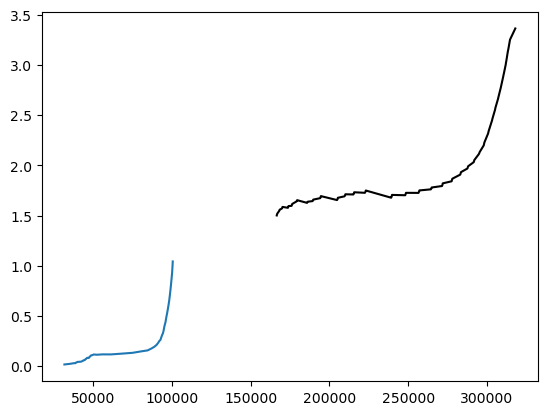

In [30]:
from matplotlib import pyplot as plt

plt.plot(x,y, "black")
plt.plot(xDV, yDV)
plt.show()

## Comparing unfiltered 

(and new DV model)

In [107]:
GATK_FG_vcf_path = "/Users/dj20y461/Downloads/FG.mend_eval_chroms.NO_MISSING.mend_eval.vcf.gz"

GATK_FG_record_dict, GATK_FG_sample_dict = parse_pedigree_VCF(GATK_FG_vcf_path, 9,10,11)

Father: FG_male_par
Mother: FG_fem_par
Offspring: FG_male_1


In [89]:
DV_FG_vcf_path = "/Users/dj20y461/Downloads/FG_family.DV.NO_MISSING.mend_eval.vcf.gz"

DV_FG_record_dict, DV_FG_sample_dict = parse_pedigree_VCF(DV_FG_vcf_path, 9,10,11)

Father: FG_male_par
Mother: FG_fem_par
Offspring: FG_male_1


In [108]:
DV_MendEvalCounts_by_GQ = {}

for record in DV_FG_record_dict:
    
    GQ = int(DV_FG_record_dict[record]['offspring_GQ'])
    
    if GQ not in DV_MendEvalCounts_by_GQ:
        DV_MendEvalCounts_by_GQ[GQ] = []
    
    DV_MendEvalCounts_by_GQ[GQ].append(DV_FG_record_dict[record]["mend_eval"])

In [109]:
from collections import Counter

DV_cumul_N_loci = 0
xDV = [] # N_SNPs
DV_cumul_N_viols = 0 # N_viols
yDV = [] # perc_violations

DV_GQs = list(sorted(DV_MendEvalCounts_by_GQ.keys()))
DV_GQs.reverse()

for i in DV_GQs:

    DV_mend_counts = Counter(DV_MendEvalCounts_by_GQ[i])
    
    DV_cumul_N_loci+=(DV_mend_counts[True]+DV_mend_counts[False])
    DV_cumul_N_viols += DV_mend_counts[True]
    DV_perc_viols = (DV_cumul_N_viols/DV_cumul_N_loci)*100
    
    #print(i, cumul_N_loci, cumul_N_viols, perc_viols)
    
    #if i % 5 == 0:
    xDV.append(DV_cumul_N_loci)
    yDV.append(DV_perc_viols)
    
#yDV.reverse()

In [110]:
GATK_MendEvalCounts_by_GQ = {}

for record in GATK_FG_record_dict:
    
    GQ = int(GATK_FG_record_dict[record]['offspring_GQ'])
    
    if GQ not in GATK_MendEvalCounts_by_GQ:
        GATK_MendEvalCounts_by_GQ[GQ] = []
    
    GATK_MendEvalCounts_by_GQ[GQ].append(GATK_FG_record_dict[record]["mend_eval"])

In [111]:
from collections import Counter

GATK_cumul_N_loci = 0
xGATK = [] # N_SNPs
GATK_cumul_N_viols = 0 # N_viols
yGATK = [] # perc_violations

GATK_GQs = list(sorted(GATK_MendEvalCounts_by_GQ.keys()))
GATK_GQs.reverse()

for i in GATK_GQs:

    GATK_mend_counts = Counter(GATK_MendEvalCounts_by_GQ[i])
    
    GATK_cumul_N_loci+=(GATK_mend_counts[True]+GATK_mend_counts[False])
    GATK_cumul_N_viols += GATK_mend_counts[True]
    GATK_perc_viols = (GATK_cumul_N_viols/GATK_cumul_N_loci)*100
    
    #print(i, cumul_N_loci, cumul_N_viols, perc_viols)
    
    #if i % 5 == 0:
    xGATK.append(GATK_cumul_N_loci)
    yGATK.append(GATK_perc_viols)
    
#yDV.reverse()

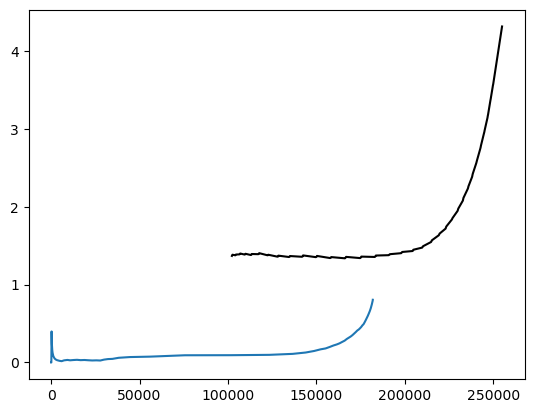

In [112]:
from matplotlib import pyplot as plt

plt.plot(xGATK,yGATK, "black")
plt.plot(xDV, yDV)
#plt.xlim(0,200000)
plt.show()

Ok so now I have a weird peak of mend inheritance violations in some of the top GQ loci, 

In [122]:
for locus in DV_FG_record_dict:
    if int(DV_FG_record_dict[locus]['offspring_GQ']) > 68:
        print(locus, DV_FG_record_dict[locus]['offspring_GQ'])

NC_053222.1_chromosome_11_9659594 69
NC_053222.1_chromosome_11_16874554 69


One question to ask is what loci are found by GATK that are not found by DV, and what are their attributes (GT, GQ, DP etc). More specifically:
- Do genotypes agree between DV and GATK where loci are called in both? 
- are the proportions of 0/1 and 1/1 genotypes different across the loci that are found in both or only one? 

In [137]:
both = list(set(DV_FG_record_dict.keys()) & set(GATK_FG_record_dict.keys()))
DV_only = list(set(DV_FG_record_dict.keys()) - set(GATK_FG_record_dict.keys()))
GATK_only = list(set(GATK_FG_record_dict.keys()) - set(DV_FG_record_dict.keys()))

In [142]:
print("Both: %s, DV_only: %s, GATK_only: %s" % (len(both), len(DV_only), len(GATK_only)))

Both: 175072, DV_only: 6795, GATK_only: 79881


In [146]:
DV_FG_sample_dict['FG_male_par'].keys()

dict_keys(['index', 'coords', 'GTs', 'DPs', 'GQs', 'ADs'])

In [174]:
import numpy as np

shared_locus_dict = {}

counter = 0
total = len(both)

for locus in both:
    
    if counter % 20000 == 0:
        print("%s/%s (%s%%) loci processed" % (counter, total, np.round((counter/total)*100,2)))

    shared_locus_dict[locus] = {}
    
    DV_locus_index = DV_FG_sample_dict['FG_male_par']["coords"].index(locus)
    
    shared_locus_dict[locus]["DV_GT"] = DV_FG_sample_dict['FG_male_par']["GTs"][DV_locus_index]
    shared_locus_dict[locus]["DV_DP"] = DV_FG_sample_dict['FG_male_par']["DPs"][DV_locus_index]
    shared_locus_dict[locus]["DV_GQ"] = DV_FG_sample_dict['FG_male_par']["GQs"][DV_locus_index]
    shared_locus_dict[locus]["DV_AD"] = DV_FG_sample_dict['FG_male_par']["ADs"][DV_locus_index]
    
    GATK_locus_index = GATK_FG_sample_dict['FG_male_par']["coords"].index(locus)
    
    shared_locus_dict[locus]["GATK_GT"] = GATK_FG_sample_dict['FG_male_par']["GTs"][GATK_locus_index]
    shared_locus_dict[locus]["GATK_DP"] = GATK_FG_sample_dict['FG_male_par']["DPs"][GATK_locus_index]
    shared_locus_dict[locus]["GATK_GQ"] = GATK_FG_sample_dict['FG_male_par']["GQs"][GATK_locus_index]
    shared_locus_dict[locus]["GATK_AD"] = GATK_FG_sample_dict['FG_male_par']["ADs"][GATK_locus_index]
    
    counter += 1
    

0/175072 (0.0%) loci processed
20000/175072 (11.42%) loci processed
40000/175072 (22.85%) loci processed
60000/175072 (34.27%) loci processed
80000/175072 (45.7%) loci processed
100000/175072 (57.12%) loci processed
120000/175072 (68.54%) loci processed
140000/175072 (79.97%) loci processed
160000/175072 (91.39%) loci processed


In [175]:
shared_locus_dict

{'NC_053227.1_chromosome_16_10764932': {'DV_GT': '1/1',
  'DV_DP': 32,
  'DV_GQ': '39',
  'DV_AD': '0,32',
  'GATK_GT': '1/1',
  'GATK_DP': 30,
  'GATK_GQ': '91',
  'GATK_AD': '0,30,0'},
 'NC_053227.1_chromosome_16_10558644': {'DV_GT': '1/1',
  'DV_DP': 24,
  'DV_GQ': '40',
  'DV_AD': '0,22',
  'GATK_GT': '1/1',
  'GATK_DP': 23,
  'GATK_GQ': '69',
  'GATK_AD': '0,23,0'},
 'NC_053222.1_chromosome_11_2145061': {'DV_GT': '1/1',
  'DV_DP': 30,
  'DV_GQ': '35',
  'DV_AD': '0,30',
  'GATK_GT': '1|1',
  'GATK_DP': 29,
  'GATK_GQ': '87',
  'GATK_AD': '0,29,0'},
 'NC_053222.1_chromosome_11_3071298': {'DV_GT': '1/1',
  'DV_DP': 24,
  'DV_GQ': '34',
  'DV_AD': '0,24',
  'GATK_GT': '1/1',
  'GATK_DP': 23,
  'GATK_GQ': '69',
  'GATK_AD': '0,23,0'},
 'NC_053227.1_chromosome_16_11004440': {'DV_GT': '1/1',
  'DV_DP': 29,
  'DV_GQ': '39',
  'DV_AD': '0,29',
  'GATK_GT': '1/1',
  'GATK_DP': 25,
  'GATK_GQ': '75',
  'GATK_AD': '0,25,0'},
 'NC_053222.1_chromosome_11_16852604': {'DV_GT': '0/1',
  'DV_DP': 

In [193]:
mismatched_loci = []
mismatch_combos = []
for locus in shared_locus_dict:
    if shared_locus_dict[locus]["GATK_GT"].replace("|","/") != shared_locus_dict[locus]["DV_GT"].replace("|","/"):
        print(shared_locus_dict[locus]["GATK_GT"], shared_locus_dict[locus]["DV_GT"])
        mismatched_loci.append(locus)
        mismatch_combos.append((shared_locus_dict[locus]["GATK_GT"].replace("|","/"), shared_locus_dict[locus]["DV_GT"].replace("|","/")))

2/2 1/1
1/2 0/1
1/3 0/1
0/0 1/1
1/2 0/1
0/1 1/1
2/2 1/1
1/2 0/1
1|0 0/1
1|0 0/1
0|1 1/1
1/2 1/1
1/2 1/1
0/0 0/1
1/1 1/2
1|1 0/1
0/1 1/1
0/1 1/1
1|1 0/1
1|0 0/1
1/2 1/1
0/0 0/1
1/2 1/1
0/2 0/1
1/2 0/1
1/2 1/1
0|1 1/1
1/1 0/1
1/2 0/1
0/0 1/1
1/2 1/1
1/2 1/1
1/2 1/1
0/1 1/1
1/2 0/1
0/0 1/1
2/2 1/1
1/2 0/1
0/0 1/1
1|0 0/1
2/2 1/1
2/2 1/1
0/2 0/1
2/2 1/1
1/2 1/1
0/0 1/1
0|1 1/1
1/2 1/1
0/2 1/1
1/2 0/1
1/2 0/1
0/1 1/1
1/1 0/1
2/2 1/1
0/1 1/1
0/3 0/1
0/1 1/1
1|1 0/1
0|1 1/1
1/2 1/1
1/2 0/1
1|0 0/1
2/2 1/1
0/0 1/1
1/2 1/1
0/0 1/1
0/0 1/1
0|1 1/1
0/0 0/1
0/1 1/1
0/2 0/1
1/4 1/2
0/0 1/1
1/2 0/1
2/2 1/1
0/1 1/1
0|1 1/1
1/3 1/1
0/0 1/1
0/1 1/1
1|1 0/1
1/2 0/1
0/1 1/1
0/0 1/1
0/1 1/1
0|1 1/1
1/2 1/1
1|0 0/1
1/2 0/1
0/1 1/1
1/2 0/1
1/2 0/1
0/1 1/1
1/2 0/1
0/2 0/1
0/0 1/1
0/0 1/1
1|0 0/1
0/0 1/1
0/2 0/1
0|1 1/1
0/0 1/1
0/1 1/1
0/0 0/1
0/1 1/1
1/1 1/2
0/0 0/1
0/0 1/1
0/0 1/1
0/1 1/1
0/1 1/1
0/1 1/1
2/2 1/1
1|1 0/1
0|1 1/1
1/2 0/1
0/0 0/1
1/1 0/1
2/2 1/1
2/2 1/1
2/2 1/1
1/2 0/1
0/0 1/1
0/0 0/1
0/0 1/1


In [194]:
print("%s (%s%%) out of %s loci mismatched" % (len(mismatched_loci), np.round((len(mismatched_loci)/len(shared_locus_dict))*100,2),len(shared_locus_dict),))

5353 (3.06%) out of 175072 loci mismatched


In [197]:
from collections import Counter

Counter(mismatch_combos).most_common()

[(('0/0', '1/1'), 878),
 (('0/1', '1/1'), 863),
 (('1/2', '0/1'), 734),
 (('1/2', '1/1'), 598),
 (('2/2', '1/1'), 592),
 (('1/0', '0/1'), 452),
 (('0/2', '0/1'), 426),
 (('0/0', '0/1'), 295),
 (('1/1', '0/1'), 235),
 (('1/1', '1/2'), 41),
 (('0/1', '1/2'), 28),
 (('0/2', '1/1'), 27),
 (('2/3', '1/2'), 23),
 (('1/3', '1/2'), 19),
 (('3/3', '0/1'), 15),
 (('1/0', '1/1'), 13),
 (('1/3', '1/1'), 12),
 (('1/3', '0/1'), 10),
 (('2/3', '0/1'), 10),
 (('1/4', '1/2'), 9),
 (('0/1', '0/0'), 8),
 (('2/3', '1/1'), 8),
 (('0/3', '0/1'), 7),
 (('2/2', '0/1'), 7),
 (('0/0', '1/2'), 7),
 (('3/3', '1/1'), 6),
 (('1/2', '0/0'), 6),
 (('1/1', '0/0'), 3),
 (('2/4', '1/2'), 3),
 (('3/4', '1/2'), 2),
 (('0/4', '0/1'), 2),
 (('1/0', '1/2'), 2),
 (('1/4', '1/1'), 2),
 (('4/5', '1/2'), 2),
 (('3/5', '0/1'), 1),
 (('5/5', '1/1'), 1),
 (('2/6', '1/1'), 1),
 (('1/2', '0/2'), 1),
 (('4/4', '0/1'), 1),
 (('2/5', '1/2'), 1),
 (('0/3', '1/1'), 1),
 (('2/2', '1/2'), 1)]

Ok so of the shared loci, a small percentage are mismatched. Of these, most are hom_alt calls that should be something else. I do notce however that there are no multiallelic calls from DV. Though this could be down to GATK GVCF filtering. I.e. I should filter alleles that are not present in each sample as ">NON_REF<" counts as an allele and increments the alt_allele index. 

***Come back to this - need to filter the GATK GVCF but the cluster is clogged up at the moment***

### What about the loci that are called in GATK and not DV? 

In [199]:
import numpy as np

GATK_only_locus_dict = {}

counter = 0
total = len(GATK_only)

for locus in GATK_only:
    
    if counter % 20000 == 0:
        print("%s/%s (%s%%) loci processed" % (counter, total, np.round((counter/total)*100,2)))

    GATK_only_locus_dict[locus] = {}
    
    GATK_locus_index = GATK_FG_sample_dict['FG_male_par']["coords"].index(locus)
    
    GATK_only_locus_dict[locus]["GATK_GT"] = GATK_FG_sample_dict['FG_male_par']["GTs"][GATK_locus_index]
    GATK_only_locus_dict[locus]["GATK_DP"] = GATK_FG_sample_dict['FG_male_par']["DPs"][GATK_locus_index]
    GATK_only_locus_dict[locus]["GATK_GQ"] = GATK_FG_sample_dict['FG_male_par']["GQs"][GATK_locus_index]
    GATK_only_locus_dict[locus]["GATK_AD"] = GATK_FG_sample_dict['FG_male_par']["ADs"][GATK_locus_index]
    
    counter += 1

0/79881 (0.0%) loci processed
20000/79881 (25.04%) loci processed
40000/79881 (50.07%) loci processed
60000/79881 (75.11%) loci processed


In [201]:
import numpy as np

DV_only_locus_dict = {}

counter = 0
total = len(DV_only)

for locus in DV_only:
    
    if counter % 20000 == 0:
        print("%s/%s (%s%%) loci processed" % (counter, total, np.round((counter/total)*100,2)))

    DV_only_locus_dict[locus] = {}
    
    DV_locus_index = DV_FG_sample_dict['FG_male_par']["coords"].index(locus)
    
    DV_only_locus_dict[locus]["GATK_GT"] = DV_FG_sample_dict['FG_male_par']["GTs"][DV_locus_index]
    DV_only_locus_dict[locus]["GATK_DP"] = DV_FG_sample_dict['FG_male_par']["DPs"][DV_locus_index]
    DV_only_locus_dict[locus]["GATK_GQ"] = DV_FG_sample_dict['FG_male_par']["GQs"][DV_locus_index]
    DV_only_locus_dict[locus]["GATK_AD"] = DV_FG_sample_dict['FG_male_par']["ADs"][DV_locus_index]
    
    counter += 1

0/6795 (0.0%) loci processed


### Compare the relative genotype frequencies between these subsets of calls

In [4]:
GATK_FG_vcf_path = "/Users/dj20y461/Downloads/FG.unfiltered.mend_eval.vcf.gz"

GATK_FG_record_dict, GATK_FG_sample_dict = parse_pedigree_VCF(GATK_FG_vcf_path, 9,10,11)

Father: FG_male_par
Mother: FG_fem_par
Offspring: FG_male_1


In [208]:
both_DV_00 = 0
both_DV_01 = 0
both_DV_11 = 0

both_GATK_00 = 0
both_GATK_01 = 0
both_GATK_11 = 0

DV_only_00 = 0
DV_only_01 = 0
DV_only_11 = 0

GATK_only_00 = 0
GATK_only_01 = 0
GATK_only_11 = 0

for locus in shared_locus_dict:
    
    ## DV 
    if shared_locus_dict[locus]["DV_GT"] in ["0|0", "0/0"]:
        both_DV_00 += 1
    elif shared_locus_dict[locus]["DV_GT"] in ["0|1", "0/1"]:
        both_DV_01 += 1
    elif shared_locus_dict[locus]["DV_GT"] in ["1|1", "1/1"]:
        both_DV_11 += 1
        
    ## GATK
    if shared_locus_dict[locus]["GATK_GT"] in ["0|0", "0/0"]:
        both_GATK_00 += 1
    elif shared_locus_dict[locus]["GATK_GT"] in ["0|1", "0/1"]:
        both_GATK_01 += 1
    elif shared_locus_dict[locus]["GATK_GT"] in ["1|1", "1/1"]:
        both_GATK_11 += 1
        
for locus in DV_only_locus_dict:

    ## DV
    if DV_only_locus_dict[locus]["GATK_GT"] in ["0|0", "0/0"]:
        DV_only_00 += 1
    elif DV_only_locus_dict[locus]["GATK_GT"] in ["0|1", "0/1"]:
        DV_only_01 += 1
    elif DV_only_locus_dict[locus]["GATK_GT"] in ["1|1", "1/1"]:
        DV_only_11 += 1
        
for locus in GATK_only_locus_dict:

    ## GATK
    if GATK_only_locus_dict[locus]["GATK_GT"] in ["0|0", "0/0"]:
        GATK_only_00 += 1
    elif GATK_only_locus_dict[locus]["GATK_GT"] in ["0|1", "0/1"]:
        GATK_only_01 += 1
    elif GATK_only_locus_dict[locus]["GATK_GT"] in ["1|1", "1/1"]:
        GATK_only_11 += 1

In [210]:
from matplotlib import pyplot as plt

plt.bar

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bars bases.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates:
    
   

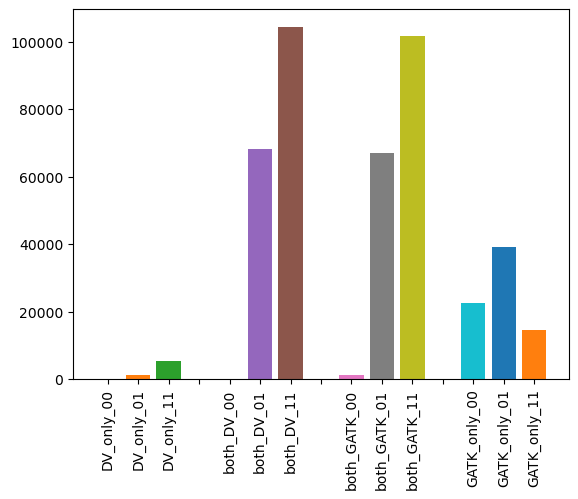

In [223]:
## DV only

plt.bar(1,DV_only_00)
plt.bar(2,DV_only_01)
plt.bar(3,DV_only_11)

## DV shared
plt.bar(5,both_DV_00)
plt.bar(6,both_DV_01)
plt.bar(7,both_DV_11)

## GATK shared

plt.bar(9,both_GATK_00)
plt.bar(10,both_GATK_01)
plt.bar(11,both_GATK_11)

## GATK_only

plt.bar(13,GATK_only_00)
plt.bar(14,GATK_only_01)
plt.bar(15,GATK_only_11)


plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
            ["DV_only_00","DV_only_01","DV_only_11",
             "",
             "both_DV_00","both_DV_01","both_DV_11",
             "",
             "both_GATK_00","both_GATK_01","both_GATK_11",
             "",
             "GATK_only_00","GATK_only_01","GATK_only_11"],
             rotation=90)
plt.show()

## Now using proportions 

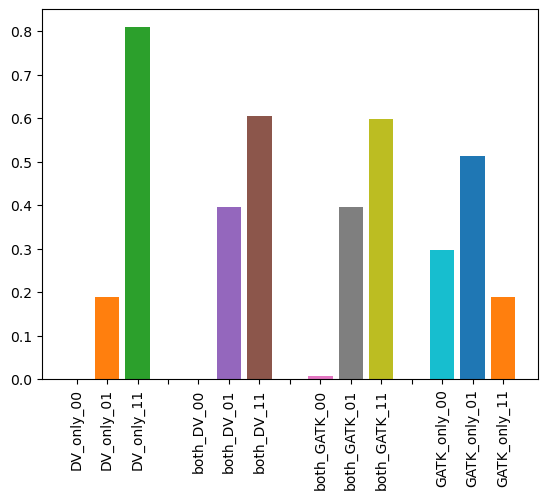

In [224]:
## DV only

DV_only_all = DV_only_00+DV_only_01+DV_only_11

plt.bar(1,DV_only_00/DV_only_all)
plt.bar(2,DV_only_01/DV_only_all)
plt.bar(3,DV_only_11/DV_only_all)

## DV shared

both_DV_all = both_DV_00+both_DV_01+both_DV_11

plt.bar(5,both_DV_00/both_DV_all)
plt.bar(6,both_DV_01/both_DV_all)
plt.bar(7,both_DV_11/both_DV_all)

## GATK shared

both_GATK_all = both_GATK_00+both_GATK_01+both_GATK_11

plt.bar(9,both_GATK_00/both_GATK_all)
plt.bar(10,both_GATK_01/both_GATK_all)
plt.bar(11,both_GATK_11/both_GATK_all)

## GATK_only

GATK_only_all = GATK_only_00+GATK_only_01+GATK_only_11

plt.bar(13,GATK_only_00/GATK_only_all)
plt.bar(14,GATK_only_01/GATK_only_all)
plt.bar(15,GATK_only_11/GATK_only_all)


plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
            ["DV_only_00","DV_only_01","DV_only_11",
             "",
             "both_DV_00","both_DV_01","both_DV_11",
             "",
             "both_GATK_00","both_GATK_01","both_GATK_11",
             "",
             "GATK_only_00","GATK_only_01","GATK_only_11"],
             rotation=90)
plt.show()

Ok so what do the genotype frequencies tell us?

- As DV and GATK agree well on the loci that are called in both, the geno freqs in the loci shared by both are not different, except perhaps a minor increase in the number of 00 in GATK relative to DV. 
- The genotpye freqs in the loci specific to each callset are very different however. 
    - DV has basically NO 0/0 calls whereas GATK has many. Is this an effect of the way I filtered to outputs of GATK and DV? 
    - And GATK has more 0/1 calls than DV. 
- Note this is actually reflected in the comparison of the mismatched genotypes, i.e. there were a lot of loci where GATK called 0/0 but DV called 1/1 or 0/1, or where GATK called 0/1 but DV called 1/1. 

So DV definitely seems to have a tendency to call 1/1 relative to GATK. Though this results in more variants, so is not the cause of the lower sensitivity of DV. 

## Checking out weird GQs 

I would like to have some idea of what is causing this weird GQ distribution. . . . The question is what genotypes are responsible for the weird bumps in the distribution? A good way to visualise this would be to plot a stacked barchart. 

### GATK first

In [269]:
GQ_dict = {}

GQ_dict["00_GQs"] = {}
GQ_dict["01_GQs"] = {}
GQ_dict["11_GQs"] = {}

for GQ in range(0,100):
    GQ_dict["00_GQs"][GQ] = 0
    GQ_dict["01_GQs"][GQ] = 0
    GQ_dict["11_GQs"][GQ] = 0

for index in range(0,len(GATK_FG_sample_dict["FG_male_1"]["coords"])):

    if GATK_FG_sample_dict["FG_male_1"]["GTs"][index] == "0/0":
        sample_GQ = int(GATK_FG_sample_dict["FG_male_1"]["GQs"][index])
        GQ_dict["00_GQs"][sample_GQ] += 1
        
    elif GATK_FG_sample_dict["FG_male_1"]["GTs"][index] == "0/1":
        sample_GQ = int(GATK_FG_sample_dict["FG_male_1"]["GQs"][index])
        GQ_dict["01_GQs"][sample_GQ] += 1
                   
    elif GATK_FG_sample_dict["FG_male_1"]["GTs"][index] == "1/1":
        sample_GQ = int(GATK_FG_sample_dict["FG_male_1"]["GQs"][index])
        GQ_dict["11_GQs"][sample_GQ] += 1
    

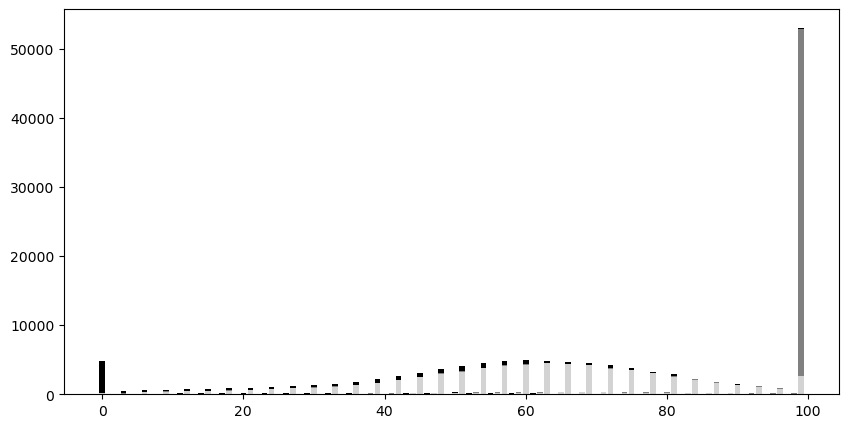

In [270]:
plt.figure(figsize = (10,5))

for i in range(0,100):
    
    plt.bar(i, GQ_dict["00_GQs"][i]+GQ_dict["01_GQs"][i]+GQ_dict["11_GQs"][i], color = "black")
    plt.bar(i, GQ_dict["01_GQs"][i]+GQ_dict["11_GQs"][i], color = "grey")
    plt.bar(i, GQ_dict["11_GQs"][i], color = "lightgrey")
    

### DV now

In [266]:
GQ_dict = {}

GQ_dict["00_GQs"] = {}
GQ_dict["01_GQs"] = {}
GQ_dict["11_GQs"] = {}

for GQ in range(0,100):
    GQ_dict["00_GQs"][GQ] = 0
    GQ_dict["01_GQs"][GQ] = 0
    GQ_dict["11_GQs"][GQ] = 0

for index in range(0,len(DV_FG_sample_dict["FG_male_1"]["coords"])):

    if DV_FG_sample_dict["FG_male_1"]["GTs"][index] == "0/0":
        sample_GQ = int(DV_FG_sample_dict["FG_male_1"]["GQs"][index])
        GQ_dict["00_GQs"][sample_GQ] += 1
        
    elif DV_FG_sample_dict["FG_male_1"]["GTs"][index] == "0/1":
        sample_GQ = int(DV_FG_sample_dict["FG_male_1"]["GQs"][index])
        GQ_dict["01_GQs"][sample_GQ] += 1
                   
    elif DV_FG_sample_dict["FG_male_1"]["GTs"][index] == "1/1":
        sample_GQ = int(DV_FG_sample_dict["FG_male_1"]["GQs"][index])
        GQ_dict["11_GQs"][sample_GQ] += 1
    

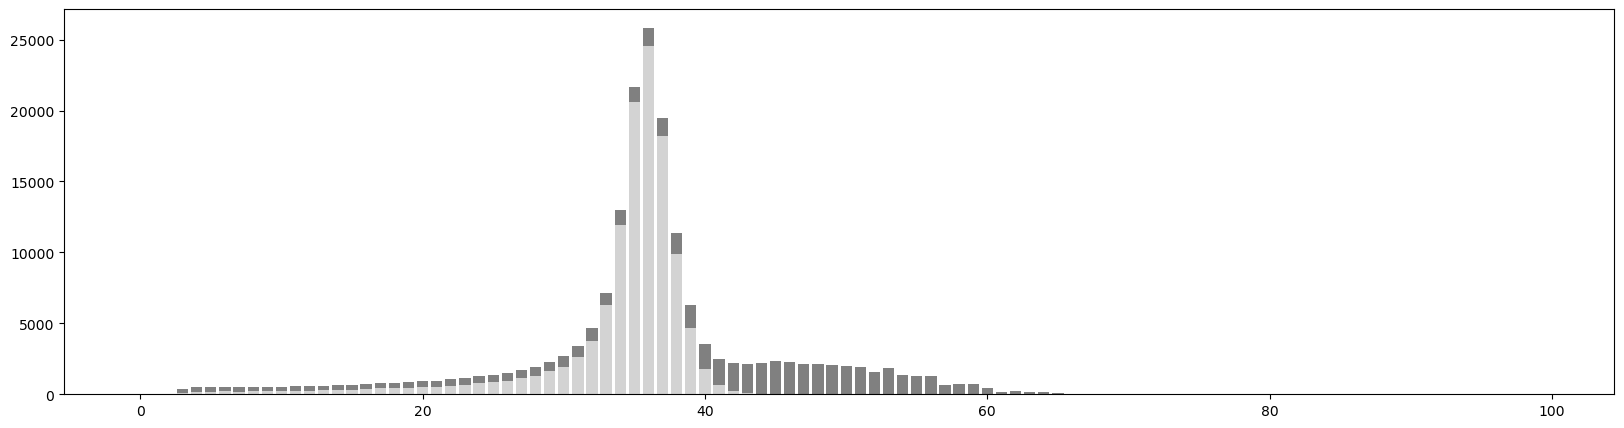

In [267]:
plt.figure(figsize = (20,5))

for i in range(0,100):
    
    plt.bar(i, GQ_dict["00_GQs"][i]+GQ_dict["01_GQs"][i]+GQ_dict["11_GQs"][i], color = "black")
    plt.bar(i, GQ_dict["01_GQs"][i]+GQ_dict["11_GQs"][i], color = "grey")
    plt.bar(i, GQ_dict["11_GQs"][i], color = "lightgrey")
    

## Manually checking DV SNP calls. 

Ok so I want to manually check some SNP calls from DV. I want to know first why DV calls so many fewer SNPs than DV. 

So I want to find GATK calls that GATK things are very confident, but that were not called in DV. . . 


In [227]:
for locus in GATK_only:
    if GATK_FG_record_dict[locus]['offspring_GQ'] == '99':
        print(locus, GATK_FG_record_dict[locus])

NC_053227.1_chromosome_16_716480 {'mend_eval': False, 'offspring_GQ': '99'}
NC_053222.1_chromosome_11_2164380 {'mend_eval': False, 'offspring_GQ': '99'}
NC_053227.1_chromosome_16_17794084 {'mend_eval': False, 'offspring_GQ': '99'}
NC_053227.1_chromosome_16_17821412 {'mend_eval': False, 'offspring_GQ': '99'}
NC_053227.1_chromosome_16_9216254 {'mend_eval': False, 'offspring_GQ': '99'}
NC_053227.1_chromosome_16_13676909 {'mend_eval': False, 'offspring_GQ': '99'}
NC_053227.1_chromosome_16_4372739 {'mend_eval': True, 'offspring_GQ': '99'}
NC_053227.1_chromosome_16_17405675 {'mend_eval': False, 'offspring_GQ': '99'}
NC_053227.1_chromosome_16_5727442 {'mend_eval': False, 'offspring_GQ': '99'}
NC_053222.1_chromosome_11_8294211 {'mend_eval': False, 'offspring_GQ': '99'}
NC_053227.1_chromosome_16_17195665 {'mend_eval': False, 'offspring_GQ': '99'}
NC_053227.1_chromosome_16_6388163 {'mend_eval': False, 'offspring_GQ': '99'}
NC_053222.1_chromosome_11_15752400 {'mend_eval': False, 'offspring_GQ': '

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



## Checking ADR of training data vs SNP calls. 

In [20]:
training_het_gts = "/Users/dj20y461/Data_temp/Stickleback/FITNESS/plot_data/training_plots/NEW/training_data_GTs/het_GTs.tmp"

ADRs = []

with open(training_het_gts) as training_hets:
    
    for locus in training_hets:
        GT, AD, DP, GQ, PL, SB = locus.strip().split(":")
        ADR = int(AD.split(",")[0])/(int(AD.split(",")[0])+int(AD.split(",")[1]))
        ADRs.append(ADR)
                          
                          

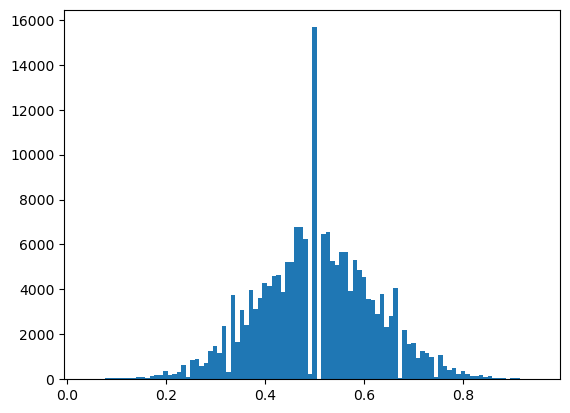

In [24]:
from matplotlib import pyplot as plt

plt.hist(ADRs, bins = 100)
plt.show()



In [38]:
test_het_gts = "/Users/dj20y461/Data_temp/Stickleback/FITNESS/plot_data/training_plots/NEW/test_calls_GTs/het_GTs.tmp"

test_ADRs = []
test_DPs = []
ADR0_DPs = []

with open(test_het_gts) as test_hets:
    
    for locus in test_hets:
        GT, GQ, DP, AD, VAF, PL = locus.strip().split(":")
        ADR = int(AD.split(",")[0])/(int(AD.split(",")[0])+int(AD.split(",")[1]))
        test_ADRs.append(ADR)
        test_DPs.append(int(DP))
        
        
        if ADR==0:
            ADR0_DPs.append(int(DP))
            #print(locus)

                          
                          

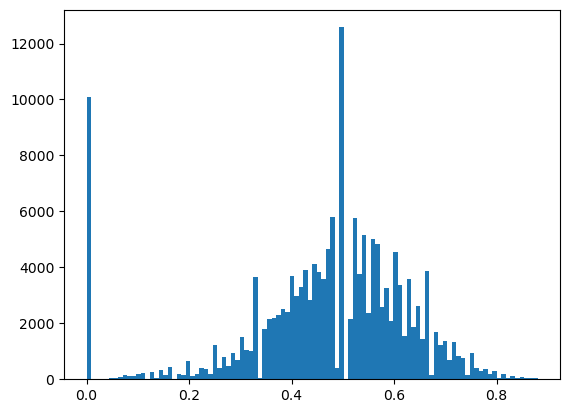

In [29]:
plt.hist(test_ADRs, bins = 100)
plt.show()

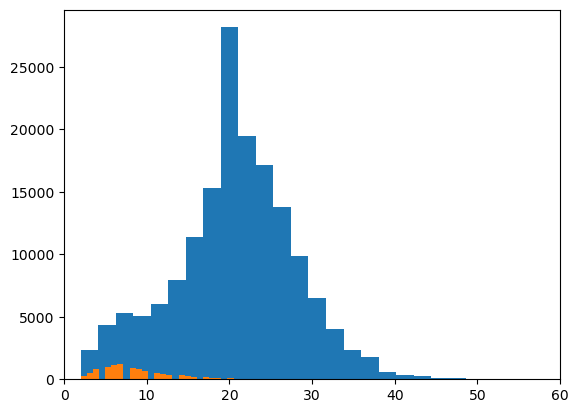

In [58]:
plt.hist(test_DPs, bins = 50)
plt.hist(ADR0_DPs, bins = 50)
plt.xlim(0,60)
plt.show()

ok so it is calling a lot of loci that should be hom_alt as het. Even though my training data has no such loci in there. The tend to be low coverage though, and make up the strange peak in coverage at het sites that we see. 

In [45]:
test_homalt_gts = "/Users/dj20y461/Data_temp/Stickleback/FITNESS/plot_data/training_plots/NEW/test_calls_GTs/hom_alt_GTs.tmp"

homalt_test_ADRs = []
homalt_test_DPs = []
homalt_ADR0_DPs = []

with open(test_homalt_gts) as test_homalts:
    
    for locus in test_homalts:
        GT, GQ, DP, AD, VAF, PL = locus.strip().split(":")
        ADR = int(AD.split(",")[0])/(int(AD.split(",")[0])+int(AD.split(",")[1]))
        homalt_test_ADRs.append(ADR)
        homalt_test_DPs.append(int(DP))
        
        
        if ADR==0:
            homalt_ADR0_DPs.append(int(DP))
            #print(locus)

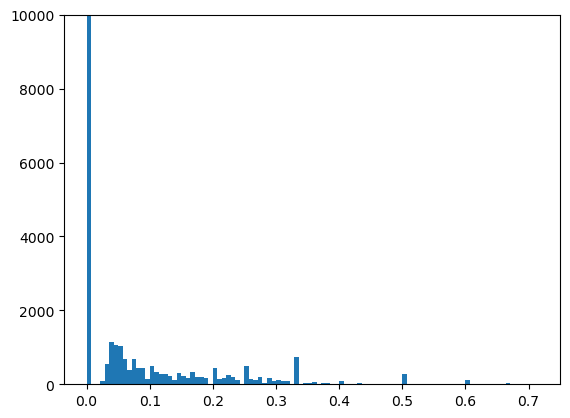

In [55]:
plt.hist(homalt_test_ADRs, bins = 100)
plt.ylim(0,10000)
plt.show()

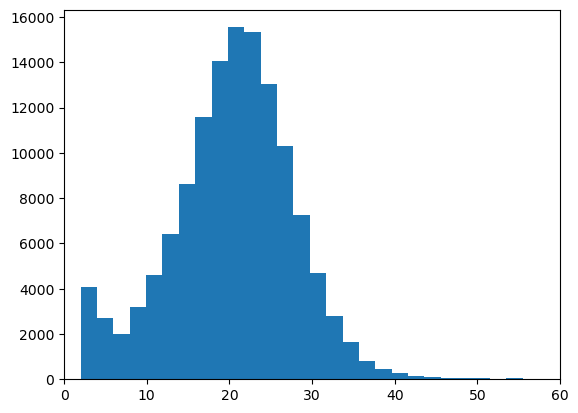

In [49]:
plt.hist(homalt_test_DPs, bins = 100)
plt.xlim(0,60)
plt.show()

In [51]:
train_homalt_gts = "/Users/dj20y461/Data_temp/Stickleback/FITNESS/plot_data/training_plots/NEW/training_data_GTs/hom_alt_GTs.tmp"

homalt_train_ADRs = []
homalt_train_DPs = []
homalt_train_ADR0_DPs = []

with open(train_homalt_gts) as train_homalts:
    
    for locus in train_homalts:
        GT,AD,DP,GQ,PL,SB = locus.strip().split(":")
        ADR = int(AD.split(",")[0])/(int(AD.split(",")[0])+int(AD.split(",")[1]))
        homalt_train_ADRs.append(ADR)
        homalt_train_DPs.append(int(DP))
        
        
        if ADR==0:
            homalt_train_ADR0_DPs.append(int(DP))
            #print(locus)

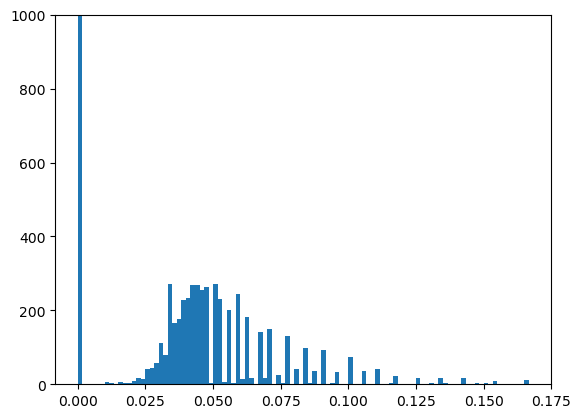

In [53]:
plt.hist(homalt_train_ADRs, bins = 100)
plt.ylim(0,1000)
plt.show()

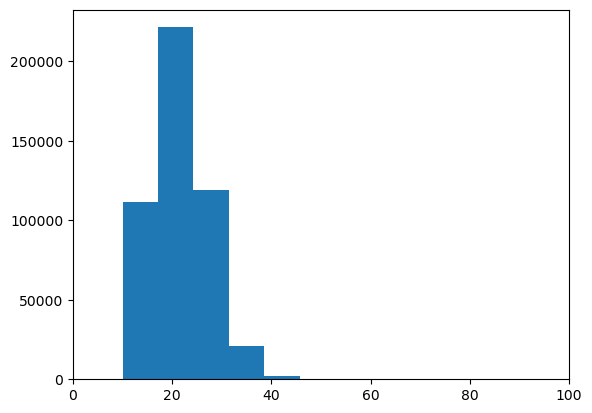

In [57]:
plt.hist(homalt_train_DPs, bins = 100)
plt.xlim(0,100)

plt.show()